Firstly We need to read the datasets, We will have a dictionary that will have the datasets in it

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import preprocessing 


world_happiness_report_dict={}
# Populating the dictionary
for i in range (5,10):
  world_happiness_report_dict["201"+str(i)]=pd.read_csv("201"+str(i)+".csv")



Now we have a look at the data and try to find problems within the datasets

In [ ]:
for i in range (5,10):
  print(world_happiness_report_dict["201"+str(i)].head())

       Country          Region  ...  Generosity  Dystopia Residual
0  Switzerland  Western Europe  ...     0.29678            2.51738
1      Iceland  Western Europe  ...     0.43630            2.70201
2      Denmark  Western Europe  ...     0.34139            2.49204
3       Norway  Western Europe  ...     0.34699            2.46531
4       Canada   North America  ...     0.45811            2.45176

[5 rows x 12 columns]
       Country          Region  ...  Generosity  Dystopia Residual
0      Denmark  Western Europe  ...     0.36171            2.73939
1  Switzerland  Western Europe  ...     0.28083            2.69463
2      Iceland  Western Europe  ...     0.47678            2.83137
3       Norway  Western Europe  ...     0.37895            2.66465
4      Finland  Western Europe  ...     0.25492            2.82596

[5 rows x 13 columns]
       Country  ...  Dystopia.Residual
0       Norway  ...           2.277027
1      Denmark  ...           2.313707
2      Iceland  ...           2.3

We can notice that some datasets have dissimilar column names, so we further investigate this by printing each datasest along with its column names

In [ ]:
for i in range (5,10):
  print(world_happiness_report_dict["201"+str(i)].columns.values)

['Country' 'Region' 'Happiness Rank' 'Happiness Score' 'Standard Error'
 'Economy (GDP per Capita)' 'Family' 'Health (Life Expectancy)' 'Freedom'
 'Trust (Government Corruption)' 'Generosity' 'Dystopia Residual']
['Country' 'Region' 'Happiness Rank' 'Happiness Score'
 'Lower Confidence Interval' 'Upper Confidence Interval'
 'Economy (GDP per Capita)' 'Family' 'Health (Life Expectancy)' 'Freedom'
 'Trust (Government Corruption)' 'Generosity' 'Dystopia Residual']
['Country' 'Happiness.Rank' 'Happiness.Score' 'Whisker.high' 'Whisker.low'
 'Economy..GDP.per.Capita.' 'Family' 'Health..Life.Expectancy.' 'Freedom'
 'Generosity' 'Trust..Government.Corruption.' 'Dystopia.Residual']
['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'Generosity' 'Perceptions of corruption']
['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'G

Now we need to rename some columns to have choerent column names

In [ ]:
world_happiness_report_dict["2015"]=world_happiness_report_dict["2015"].rename(columns={"Economy (GDP per Capita)":"GDP per Capita",
                                                    "Family":"Social Support",
                                                    "Health (Life Expectancy)":"Life Expectancy",
                                                    "Trust (Government Corruption)":"Government Corruption",
                                                    })
world_happiness_report_dict["2016"]=world_happiness_report_dict["2016"].rename(columns={"Economy (GDP per Capita)":"GDP per Capita",
                                                    "Family":"Social Support",
                                                    "Health (Life Expectancy)":"Life Expectancy",
                                                    "Trust (Government Corruption)":"Government Corruption",
                                                    })
world_happiness_report_dict["2017"]=world_happiness_report_dict["2017"].rename(columns={"Happiness.Rank":"Happiness Rank",
                                                                                        "Happiness.Score":"Happiness Score",
                                                                                        "Whisker.high":"Lower Confidence Interval",
                                                                                        "Whisker.low":"Upper Confidence Interval",
                                                                                        "Economy..GDP.per.Capita.":"GDP per Capita",
                                                                                        "Family":"Social Support",
                                                                                        "Health..Life.Expectancy.":"Life Expectancy",
                                                                                        "Trust..Government.Corruption.":"Government Corruption",
                                                                                        "Dystopia.Residual":"Dystopia Residual"
                                                                                        })

world_happiness_report_dict["2018"]=world_happiness_report_dict["2018"].rename(columns={
    "Overall rank":"Happiness Rank",
    "Country or region":"Country",
    "Score":"Happiness Score",
    "GDP per capita":"GDP per Capita",
    "Social support":"Social Support",
    "Healthy life expectancy":"Life Expectancy",
    "Freedom to make life choices":"Freedom",
    "Perceptions of corruption":"Government Corruption"
    })
world_happiness_report_dict["2019"]=world_happiness_report_dict["2019"].rename(columns={
   "Overall rank":"Happiness Rank",
    "Country or region":"Country",
    "Score":"Happiness Score",
    "GDP per capita":"GDP per Capita",
    "Social support":"Social Support",
    "Healthy life expectancy":"Life Expectancy",
    "Freedom to make life choices":"Freedom",
    "Perceptions of corruption":"Government Corruption"
    })


First problem we find is that some datasets have region column and country column while some have region only or country only or region or country column so we need all of them to have one column for country and the other column for region, an approach to this is to create a dictionary that holds for each country which region it is in, we will populate the dictionary with the dataframes that have both region and country columns (2015 and 2016)

In [ ]:
countries_regions_dict={}
for index,row in world_happiness_report_dict["2015"].iterrows():
  countries_regions_dict[row["Country"]]=row["Region"]
for index,row in world_happiness_report_dict["2016"].iterrows():
  countries_regions_dict[row["Country"]]=row["Region"]
print(countries_regions_dict)

{'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Denmark': 'Western Europe', 'Norway': 'Western Europe', 'Canada': 'North America', 'Finland': 'Western Europe', 'Netherlands': 'Western Europe', 'Sweden': 'Western Europe', 'New Zealand': 'Australia and New Zealand', 'Australia': 'Australia and New Zealand', 'Israel': 'Middle East and Northern Africa', 'Costa Rica': 'Latin America and Caribbean', 'Austria': 'Western Europe', 'Mexico': 'Latin America and Caribbean', 'United States': 'North America', 'Brazil': 'Latin America and Caribbean', 'Luxembourg': 'Western Europe', 'Ireland': 'Western Europe', 'Belgium': 'Western Europe', 'United Arab Emirates': 'Middle East and Northern Africa', 'United Kingdom': 'Western Europe', 'Oman': 'Middle East and Northern Africa', 'Venezuela': 'Latin America and Caribbean', 'Singapore': 'Southeastern Asia', 'Panama': 'Latin America and Caribbean', 'Germany': 'Western Europe', 'Chile': 'Latin America and Caribbean', 'Qatar': 'Middle East and 

Now we add the region column to all the other dataframes

In [ ]:
world_happiness_report_dict["2017"]["Region"]=world_happiness_report_dict["2017"]["Country"].map(countries_regions_dict)
world_happiness_report_dict["2018"]["Region"]=world_happiness_report_dict["2018"]["Country"].map(countries_regions_dict)
world_happiness_report_dict["2019"]["Region"]=world_happiness_report_dict["2019"]["Country"].map(countries_regions_dict)


Now we have a look again at the column names of the dataframes

In [ ]:
for i in range (5,10):
  print(world_happiness_report_dict["201"+str(i)].columns.values)

['Country' 'Region' 'Happiness Rank' 'Happiness Score' 'Standard Error'
 'GDP per Capita' 'Social Support' 'Life Expectancy' 'Freedom'
 'Government Corruption' 'Generosity' 'Dystopia Residual']
['Country' 'Region' 'Happiness Rank' 'Happiness Score'
 'Lower Confidence Interval' 'Upper Confidence Interval' 'GDP per Capita'
 'Social Support' 'Life Expectancy' 'Freedom' 'Government Corruption'
 'Generosity' 'Dystopia Residual']
['Country' 'Happiness Rank' 'Happiness Score' 'Lower Confidence Interval'
 'Upper Confidence Interval' 'GDP per Capita' 'Social Support'
 'Life Expectancy' 'Freedom' 'Generosity' 'Government Corruption'
 'Dystopia Residual' 'Region']
['Happiness Rank' 'Country' 'Happiness Score' 'GDP per Capita'
 'Social Support' 'Life Expectancy' 'Freedom' 'Generosity'
 'Government Corruption' 'Region']
['Happiness Rank' 'Country' 'Happiness Score' 'GDP per Capita'
 'Social Support' 'Life Expectancy' 'Freedom' 'Generosity'
 'Government Corruption' 'Region']


So now the column namings are similar but the columns are not sorted correctly so we will sort the column names by alphabetic order to ensure the same order. We will also drop the odd column out (Lower Confidence Interval and Upper Confidence Interval)

In [ ]:
world_happiness_report_dict["2016"]=world_happiness_report_dict["2016"].drop(["Dystopia Residual","Lower Confidence Interval","Upper Confidence Interval"],axis=1)
world_happiness_report_dict["2017"]=world_happiness_report_dict["2017"].drop(["Dystopia Residual","Lower Confidence Interval","Upper Confidence Interval"],axis=1)
world_happiness_report_dict["2015"]=world_happiness_report_dict["2015"].drop(["Dystopia Residual","Standard Error"],axis=1)
for i in range (5,10):
  world_happiness_report_dict["201"+str(i)]=world_happiness_report_dict["201"+str(i)].reindex(sorted(world_happiness_report_dict["201"+str(i)].columns), axis=1)
for i in range (5,10):
  print(world_happiness_report_dict["201"+str(i)].columns.values)

['Country' 'Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Region'
 'Social Support']
['Country' 'Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Region'
 'Social Support']
['Country' 'Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Region'
 'Social Support']
['Country' 'Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Region'
 'Social Support']
['Country' 'Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Region'
 'Social Support']


Now all of our data have the same column names with the same order . Now let's merge all our dataframes into one dataframe and have a column to signify the year

In [ ]:
dataframes_to_be_merged=[]
for i in range (5,10):
  world_happiness_report_dict["201"+str(i)]["Year"]="201"+str(i)
  dataframes_to_be_merged.append(world_happiness_report_dict["201"+str(i)])
world_happiness_report_df=pd.concat(dataframes_to_be_merged)
print(world_happiness_report_df)


                      Country  Freedom  ...  Social Support  Year
0                 Switzerland  0.66557  ...         1.34951  2015
1                     Iceland  0.62877  ...         1.40223  2015
2                     Denmark  0.64938  ...         1.36058  2015
3                      Norway  0.66973  ...         1.33095  2015
4                      Canada  0.63297  ...         1.32261  2015
..                        ...      ...  ...             ...   ...
151                    Rwanda  0.55500  ...         0.71100  2019
152                  Tanzania  0.41700  ...         0.88500  2019
153               Afghanistan  0.00000  ...         0.51700  2019
154  Central African Republic  0.22500  ...         0.00000  2019
155               South Sudan  0.01000  ...         0.57500  2019

[782 rows x 11 columns]


Now our dataframes have been merged into one dataframe that we will use to analyze the data. We first need to check the missing data and deal with it

In [ ]:
print(world_happiness_report_df.isnull().sum().sort_values(ascending = False))


Region                   8
Government Corruption    1
Year                     0
Social Support           0
Life Expectancy          0
Happiness Score          0
Happiness Rank           0
Generosity               0
GDP per Capita           0
Freedom                  0
Country                  0
dtype: int64


We will drop the row with no government corruption value

In [ ]:
world_happiness_report_df=world_happiness_report_df[world_happiness_report_df["Government Corruption"].notna()]
world_happiness_report_df=world_happiness_report_df[world_happiness_report_df["Region"].notna()]
print(world_happiness_report_df.isnull().sum().sort_values(ascending = False))



Year                     0
Social Support           0
Region                   0
Life Expectancy          0
Happiness Score          0
Happiness Rank           0
Government Corruption    0
Generosity               0
GDP per Capita           0
Freedom                  0
Country                  0
dtype: int64


We now need to normalize our numbers as they are not on the same scale (this will help us to compare between these columns)

In [ ]:
z_scaler = StandardScaler()
col_array=["Freedom","GDP per Capita","Generosity","Government Corruption","Happiness Score","Life Expectancy","Social Support"]
min_max_scaler = MinMaxScaler()
world_happiness_report_df[col_array] = min_max_scaler.fit_transform(world_happiness_report_df[col_array])

Now that we have our dataset with no null values we will move to visualizing our data.

First we will plot line graphs showing the average happiness score, gdp per capita, freedom over the course of the years

['Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Social Support']


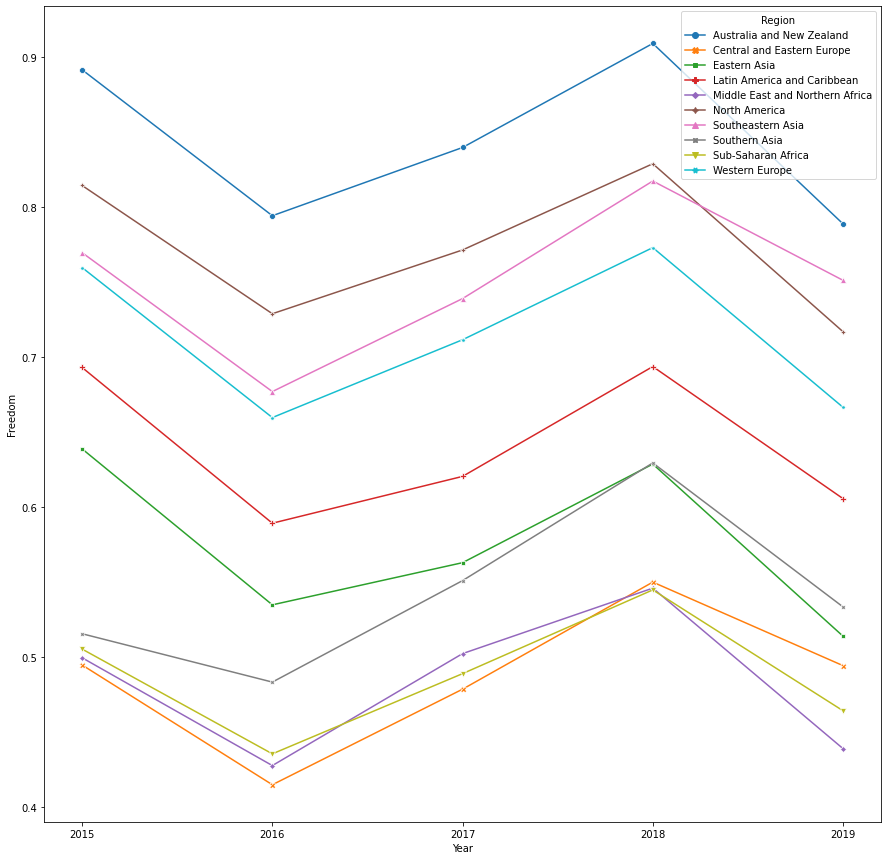

In [ ]:
world_happiness_report_df_means=world_happiness_report_df.groupby(['Region',"Year"]).mean()
col_array=["Freedom","GDP per Capita","Generosity","Government Corruption","Happiness Score","Life Expectancy","Social Support"]
print(world_happiness_report_df_means.columns.values)
fig, ax = pyplot.subplots(figsize=(15,15))
sns.lineplot(data=world_happiness_report_df_means, x="Year", y="Freedom", hue="Region",style="Region",markers=True, dashes=False)

As we can see European Regions have higher freedom values than other regions, there is an overall drop in freedom in the year of 2019 for all regions with North Africn and Middle East Region with the lowest freedom score

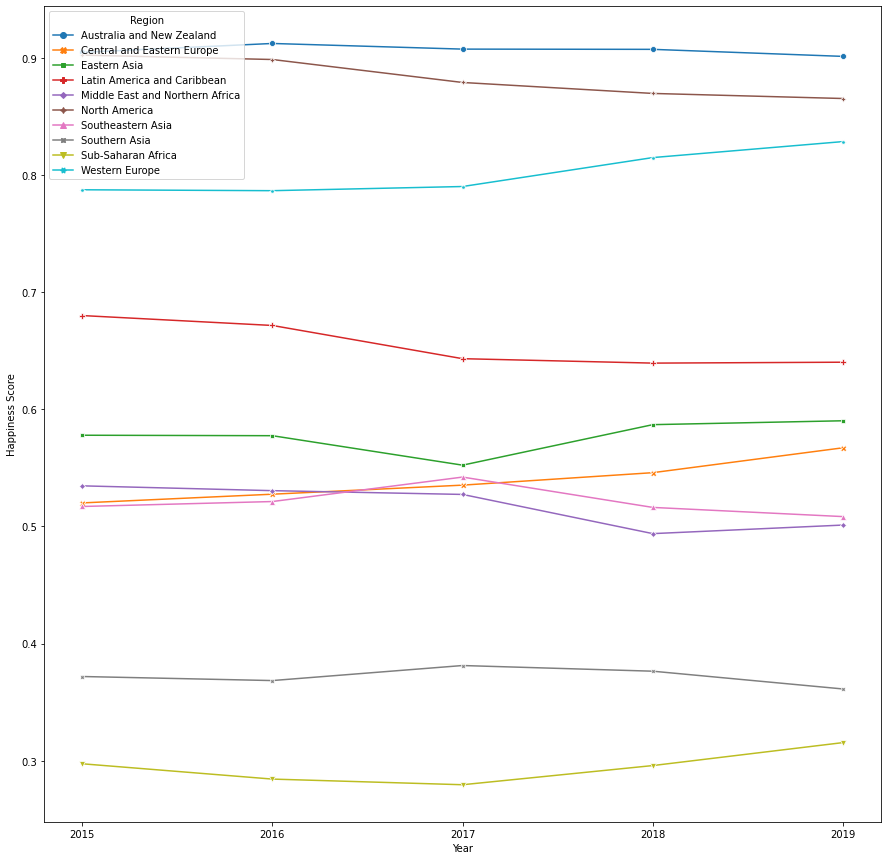

In [ ]:
fig, ax = pyplot.subplots(figsize=(15,15))

sns.lineplot(data=world_happiness_report_df_means, x="Year", y="Happiness Score", hue="Region",style="Region",markers=True, dashes=False)

The graph shows us that African and middle eastern regions have the lowest happiness scores of all regions while Australia and New Zealand have the highest happiness scores

Now let's have a look at how the regions' GDP per capita change over the years

['Freedom' 'GDP per Capita' 'Generosity' 'Government Corruption'
 'Happiness Rank' 'Happiness Score' 'Life Expectancy' 'Social Support']


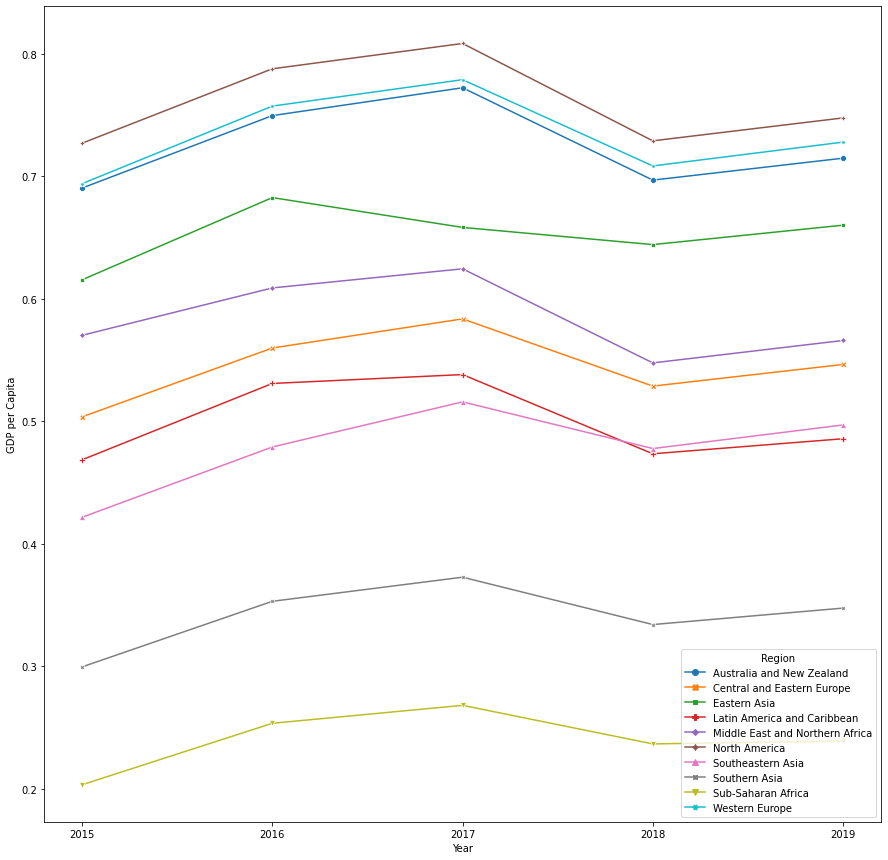

In [ ]:
fig, ax = pyplot.subplots(figsize=(15,15))
print(world_happiness_report_df_means.columns.values)
sns.lineplot(data=world_happiness_report_df_means, x="Year", y="GDP per Capita", hue="Region",style="Region",markers=True, dashes=False)

Now Let's see how life expectancy changes over the five years

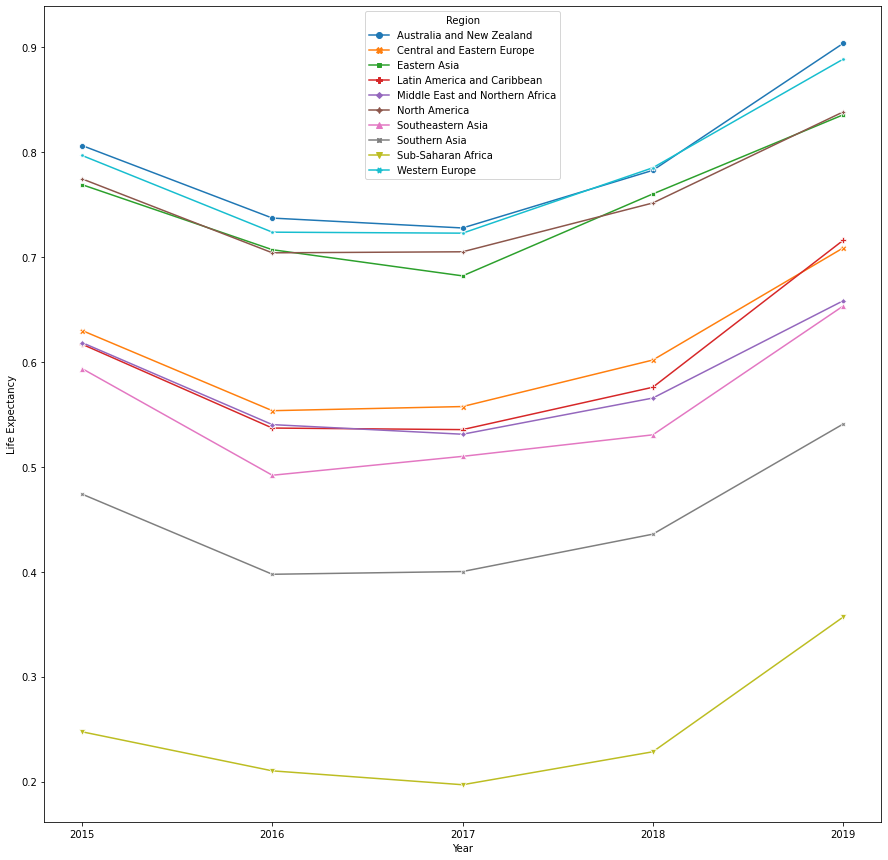

In [ ]:
fig, ax = pyplot.subplots(figsize=(15,15))
sns.lineplot(data=world_happiness_report_df_means, x="Year", y="Life Expectancy", hue="Region",style="Region",markers=True, dashes=False)


We find that African regions have significtantly low life expectancy compared to other regions, moreover there was a steady decrease in life expectancy values for all regions in the years 2015,2016 and 2017 then there was a significant increase in average life expectancy in all regions in the following years after 2017

Now Let's have a look at the distribution of all of the columns



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

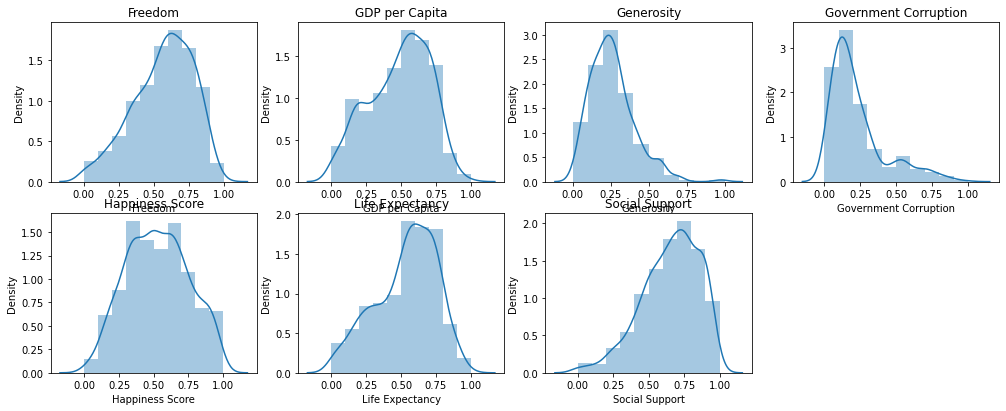

In [ ]:
fig, ax = plt.subplots(figsize=(17,17))
col_dict = {'Freedom':1, 'GDP per Capita':2, 'Generosity':3, 'Government Corruption':4,
 'Happiness Score':5, 'Life Expectancy':6,
 'Social Support':7}
for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     ax = sns.distplot(world_happiness_report_df[variable],bins=10)
                     plt.title(variable)



We used 10 bins to display the distribution of data, as we can see most data is bimodal , , government and corruption  and generosity are left skewed while social support and life expectancy are skewed to the right.

We will now display the boxplots of the data to check for outliers

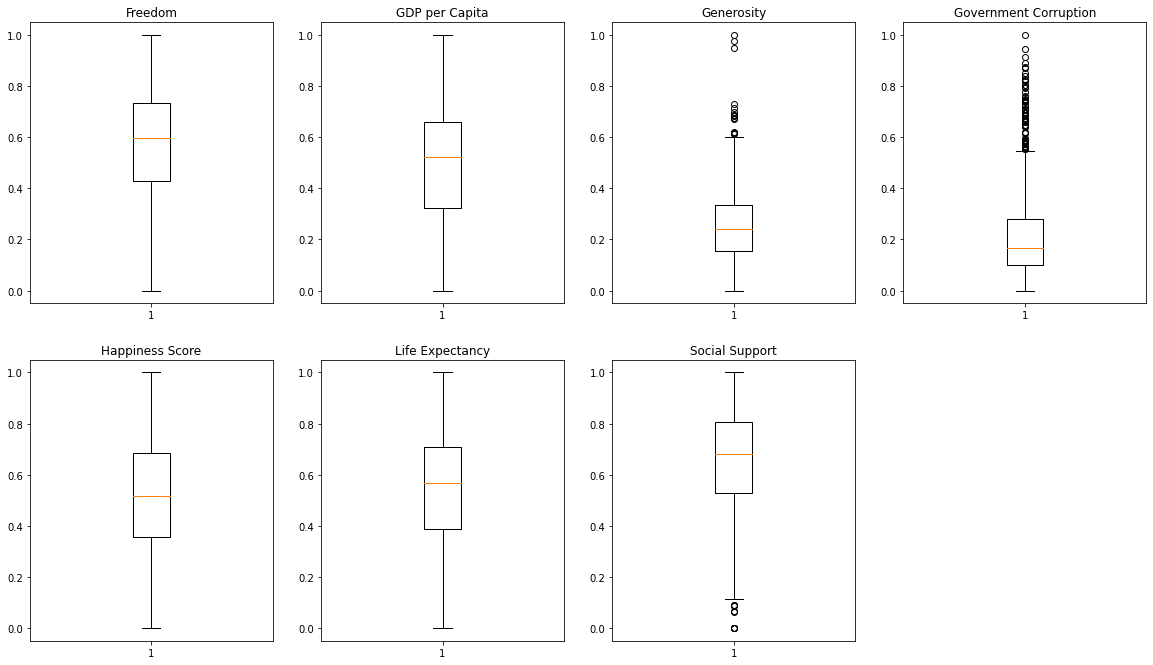

In [ ]:
plt.figure(figsize=(20,30))


for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(world_happiness_report_df[variable],whis=1.5)
                     plt.title(variable)

plt.show()


As we can see there most outliers are in the government corruption column, upon looking at the data this made sense that there are a lot of countries that are extremely corrupt, we will be using the outliers in our questions 

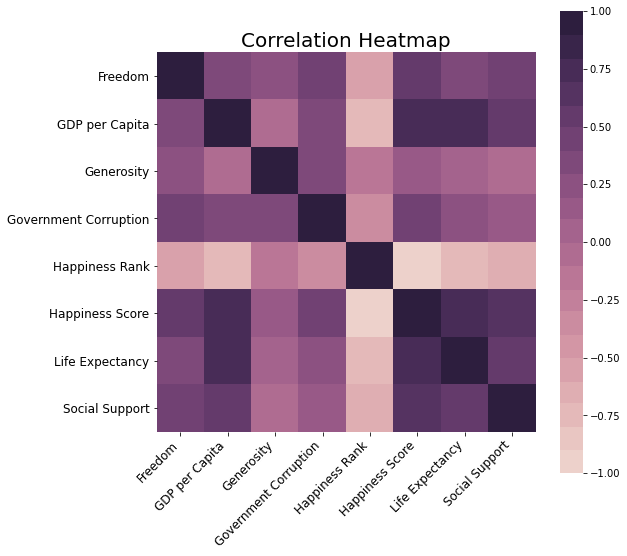

In [ ]:

corr = world_happiness_report_df.corr()
fig, ax = plt.subplots(figsize = (8.5,8.5))
ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center= 0, 
    cmap= sns.cubehelix_palette (20), 
    square = True
)

ax.set_title ("Correlation Heatmap", fontsize = 20)


ax.set_yticklabels (
    ax.get_yticklabels(), 
    fontsize = 12
)

ax.set_xticklabels (
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right",
    fontsize = 12
)

plt.show()
world_happiness_report_df=world_happiness_report_df.rename(columns={"Freedom":"Freedom on Happiness",
                                         "GDP per Capita":"GDP per Capita on Happiness",
                                         "Generosity":"Generosity on Happiness",
                                         "Government Corruption":"Government Corruption on Happiness",
                                         "Life Expectancy":"Life Expectancy on Happiness",
                                         "Social Support":"Social Support on Happiness"
                                         })

Here we observer the correlation heatmap, we find a strong correlation with GDP per capita and happiness as well as life expectancy, we also find a very strong correlation between Social Support and Happiness Score as well as life Expectancy. There are also negative correlations between Social support and happiness rank , life expectancy and happiness rank,GDP per capita and happiness rank

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for charts
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
import os
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
import scipy.stats as stats

In [ ]:
Life_Expectancy_Data_df = pd.read_csv('Life Expectancy Data.csv')
Life_Expectancy_Data_df.columns = ['Country','Year','Status','Life Expectancy','Adult Mortality','Infant Deaths',
'Alcohol','Percentage Expenditure','Hepatitis B','Measles','BMI','Under-Five Deaths','Polio','Total Expenditure',
'Diphtheria','HIV/AIDS','GDP','Population','Thinness 1-19 Years','Thinness 5-9 Years',
'Income Composition of Resources','Schooling']
Life_Expectancy_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
Life_Expectancy_Data_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 Years                 34
Thinness 5-9 Years                  34
Income Composition of Resources    167
Schooling                          163
dtype: int64

Renaming column names to appropriate names and checking for number of 
null values for each variable

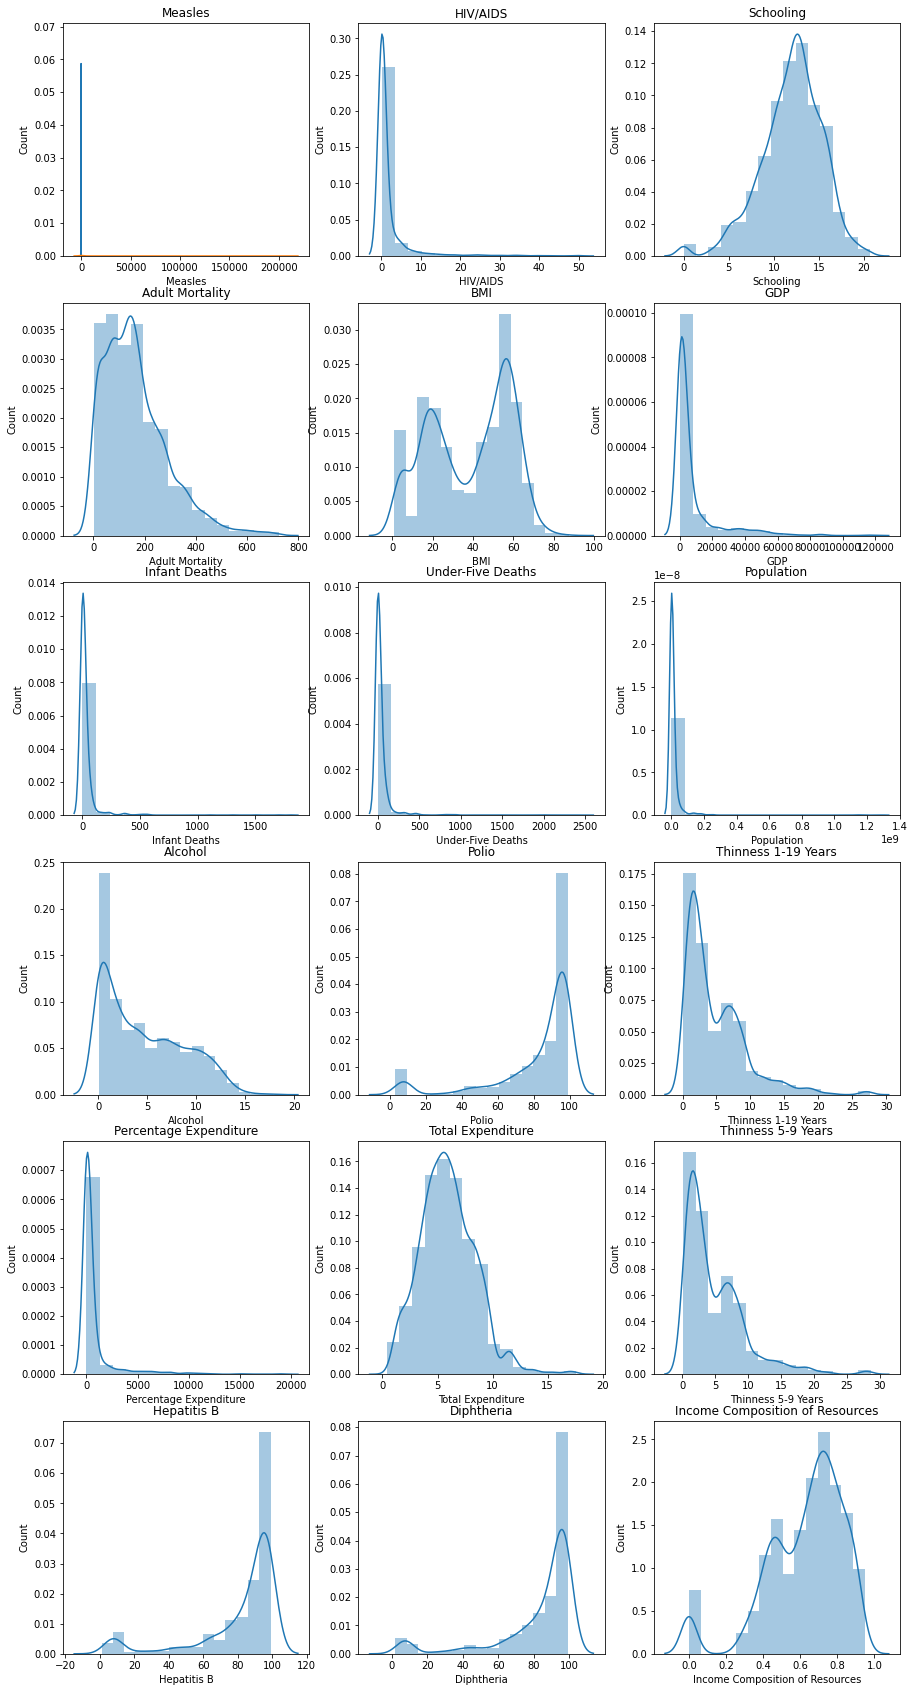

In [ ]:
warnings.filterwarnings("ignore")
features = Life_Expectancy_Data_df.iloc[:,3:].columns
fig,axs = plt.subplots(figsize=(15,30),nrows=6,ncols=3)
count = 0
for i,col in enumerate(features):
  ax = sns.distplot(a=Life_Expectancy_Data_df[col],bins=15,kde=True,ax=axs[i%6,count])
  ax.set(xlabel=col,ylabel="Count")
  ax.set_title(col)
  if (i%6==0 and i>0):
    count+=1

Distribution plots to visualise each column and whether they are modal/bi-modal/multi-modal and if they are positively or negatively skewed.

In [ ]:
fill_list = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling']

filter_list = ['Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling']

country_list = Life_Expectancy_Data_df.Country.unique()
for country in country_list:
    Life_Expectancy_Data_df.loc[Life_Expectancy_Data_df['Country'] == country,fill_list] = Life_Expectancy_Data_df.loc[Life_Expectancy_Data_df['Country'] == country,fill_list].interpolate()
#Life_Expectancy_Data_df.dropna(inplace=True)

for name in filter_list: 
  Life_Expectancy_Data_df[name].fillna(Life_Expectancy_Data_df[name].mode().iloc[0], inplace=True)

Smoothing the data and getting rid of null values using mode to fill the missing values as the graphs above displayed skewed data in most cases

In [ ]:
Life_Expectancy_Data_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 Years                0
Thinness 5-9 Years                 0
Income Composition of Resources    0
Schooling                          0
dtype: int64

Checking number of null values after imputation using mode

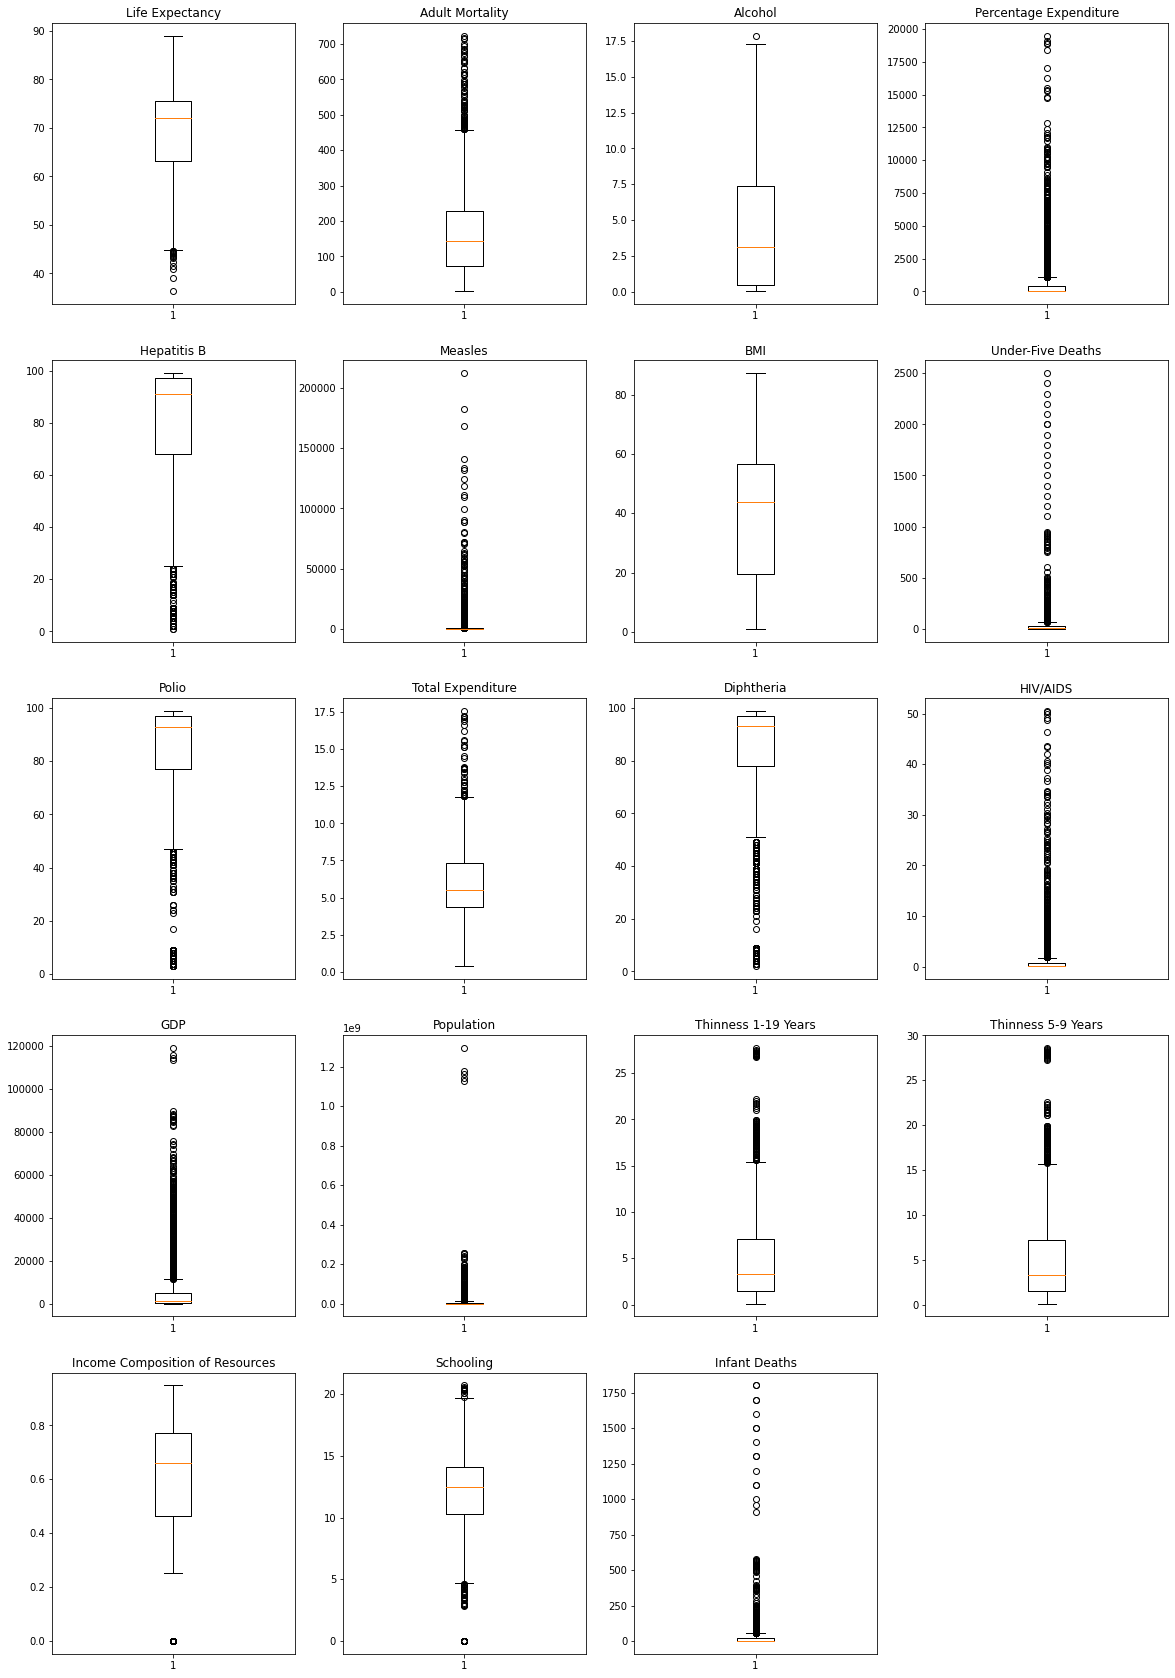

In [ ]:
col_dict = {'Life Expectancy':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'Percentage Expenditure': 4, 'Hepatitis B': 5,
       'Measles' : 6, 'BMI': 7, 'Under-Five Deaths' : 8, 'Polio' : 9, 'Total Expenditure' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'Thinness 1-19 Years' :15, 'Thinness 5-9 Years' :16,
       'Income Composition of Resources' : 17, 'Schooling' :18, 'Infant Deaths':19}

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(Life_Expectancy_Data_df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(Life_Expectancy_Data_df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((Life_Expectancy_Data_df[variable] > max_val) | (Life_Expectancy_Data_df[variable] < min_val))[0]))))
      #,len((np.where((Life_Expectancy_Data_df[variable] > max_val) | (Life_Expectancy_Data_df[variable] < min_val))[0]))*100/2938))

Number of outliers and percentage of it in Life Expectancy : 17
Number of outliers and percentage of it in Adult Mortality : 85
Number of outliers and percentage of it in Alcohol : 1
Number of outliers and percentage of it in Percentage Expenditure : 389
Number of outliers and percentage of it in Hepatitis B : 303
Number of outliers and percentage of it in Measles : 542
Number of outliers and percentage of it in BMI : 0
Number of outliers and percentage of it in Under-Five Deaths : 394
Number of outliers and percentage of it in Polio : 260
Number of outliers and percentage of it in Total Expenditure : 47
Number of outliers and percentage of it in Diphtheria : 304
Number of outliers and percentage of it in HIV/AIDS : 542
Number of outliers and percentage of it in GDP : 428
Number of outliers and percentage of it in Population : 438
Number of outliers and percentage of it in Thinness 1-19 Years : 89
Number of outliers and percentage of it in Thinness 5-9 Years : 96
Number of outliers and

Getting number of outliers for each variable

Next we are going to use winsorization to get rid of outliers.

Winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

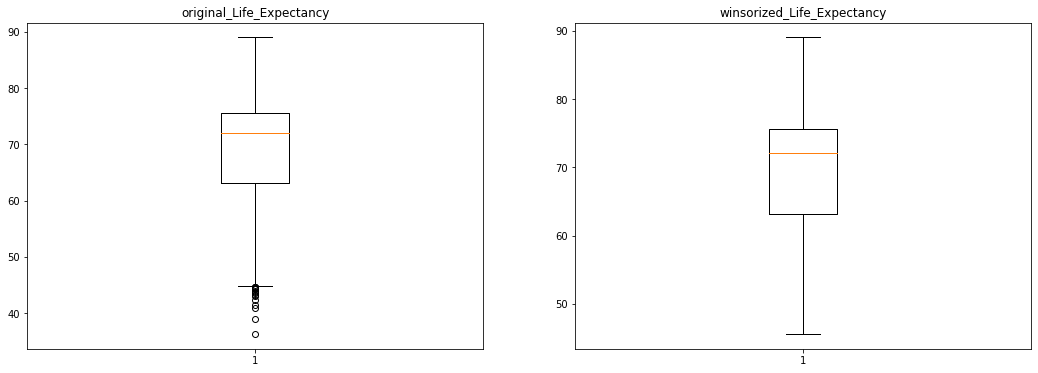

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = Life_Expectancy_Data_df['Life Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(Life_Expectancy_Data_df['Life Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

Text(0.5, 1.0, 'winsorized_Adult_Mortality')

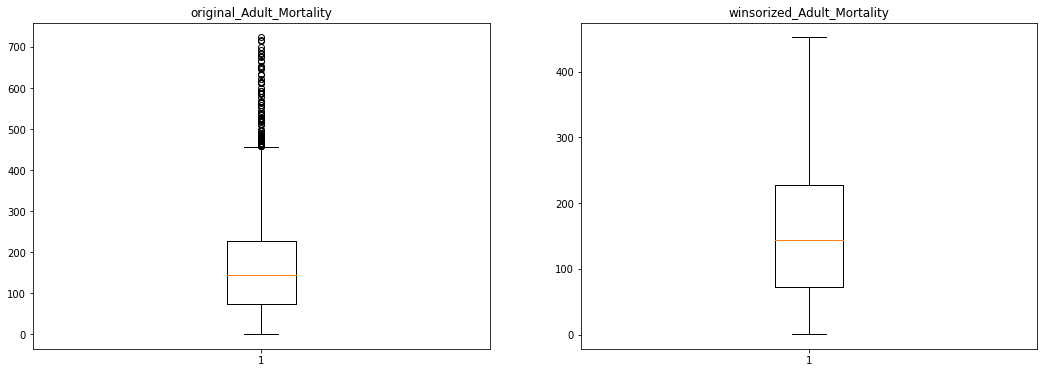

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = Life_Expectancy_Data_df['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(Life_Expectancy_Data_df['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

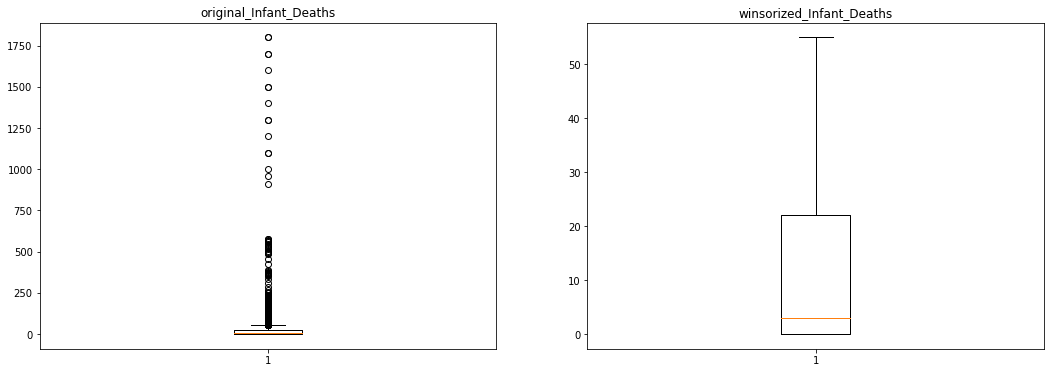

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = Life_Expectancy_Data_df['Infant Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(Life_Expectancy_Data_df['Infant Deaths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

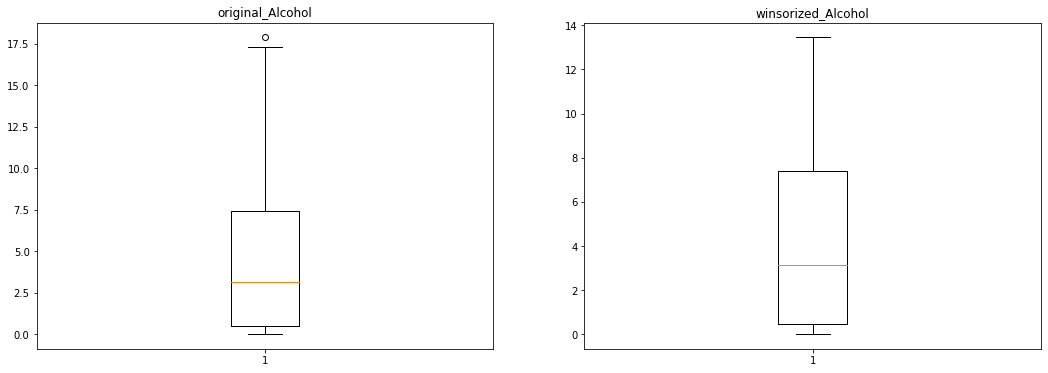

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = Life_Expectancy_Data_df['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(Life_Expectancy_Data_df['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

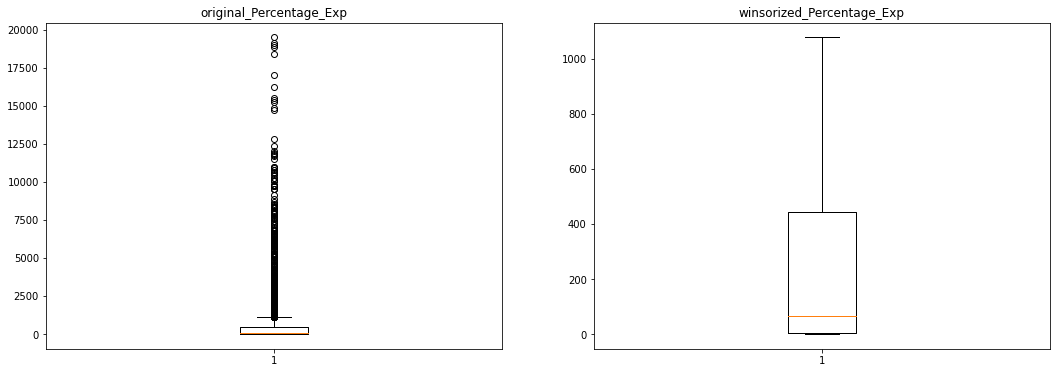

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = Life_Expectancy_Data_df['Percentage Expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(Life_Expectancy_Data_df['Percentage Expenditure'],(0,0.135))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

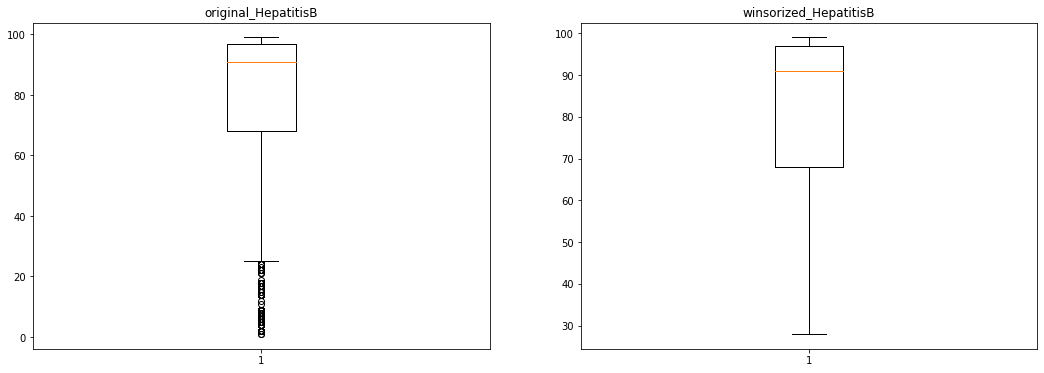

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = Life_Expectancy_Data_df['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(Life_Expectancy_Data_df['Hepatitis B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

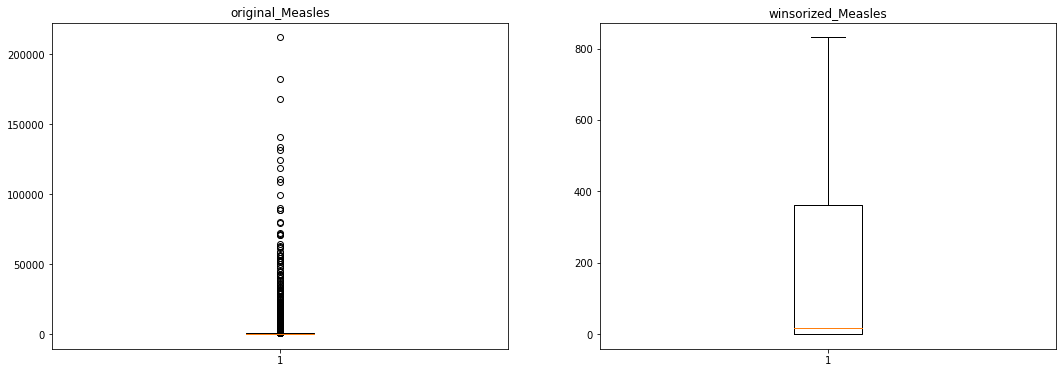

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = Life_Expectancy_Data_df['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(Life_Expectancy_Data_df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

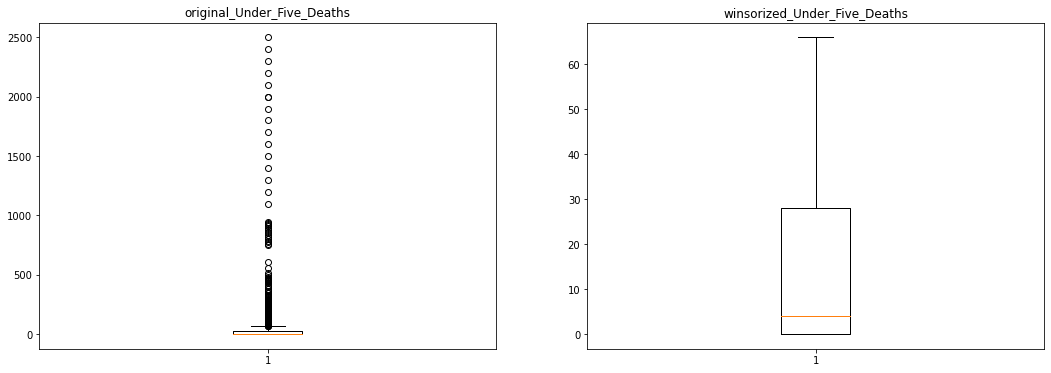

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = Life_Expectancy_Data_df['Under-Five Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(Life_Expectancy_Data_df['Under-Five Deaths'],(0,0.14))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

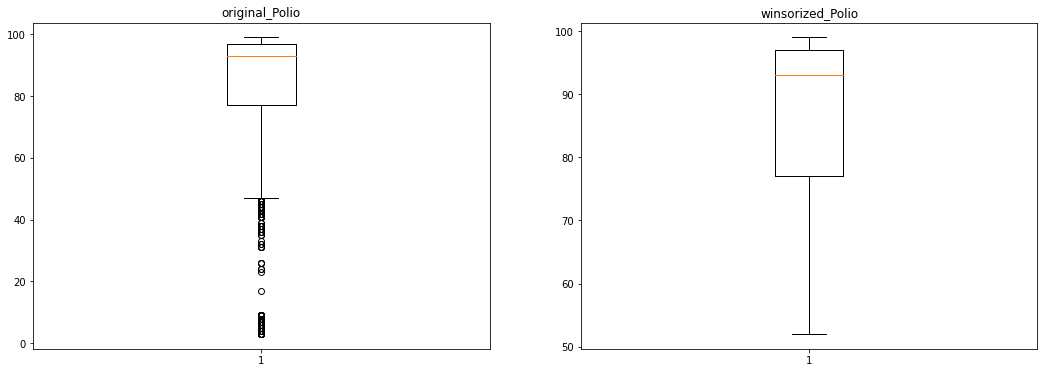

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = Life_Expectancy_Data_df['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(Life_Expectancy_Data_df['Polio'],(0.1,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

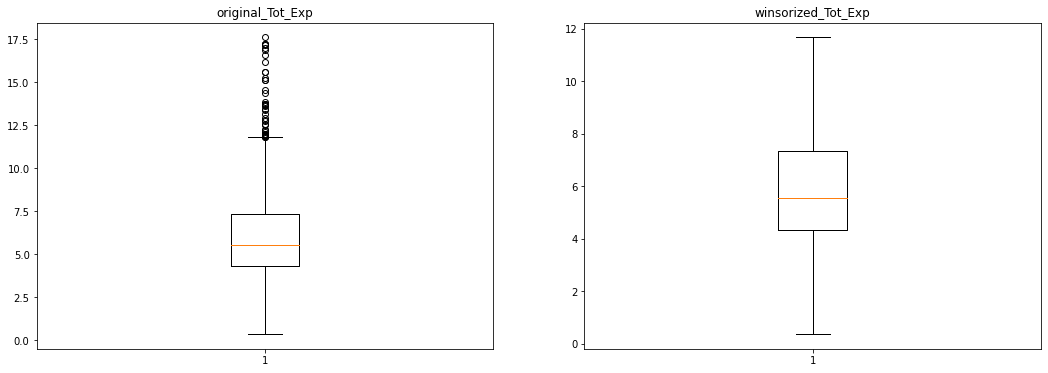

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = Life_Expectancy_Data_df['Total Expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(Life_Expectancy_Data_df['Total Expenditure'],(0,0.02))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

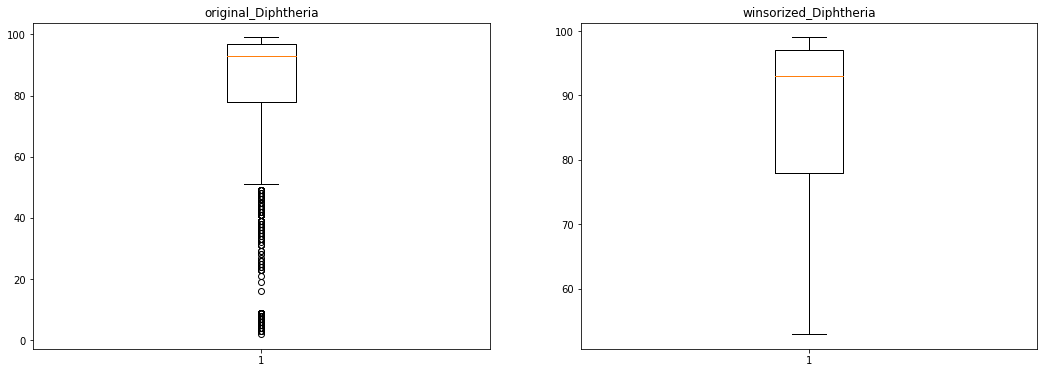

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = Life_Expectancy_Data_df['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(Life_Expectancy_Data_df['Diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

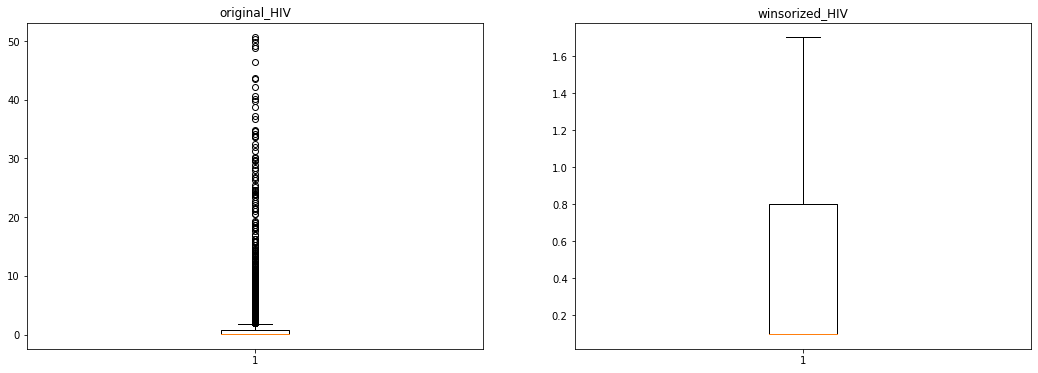

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = Life_Expectancy_Data_df['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(Life_Expectancy_Data_df['HIV/AIDS'],(0,0.19))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

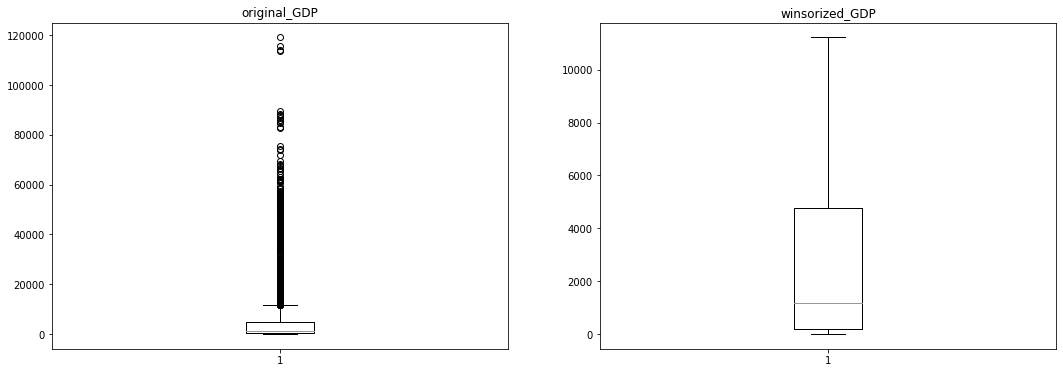

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = Life_Expectancy_Data_df['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(Life_Expectancy_Data_df['GDP'],(0,0.15))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

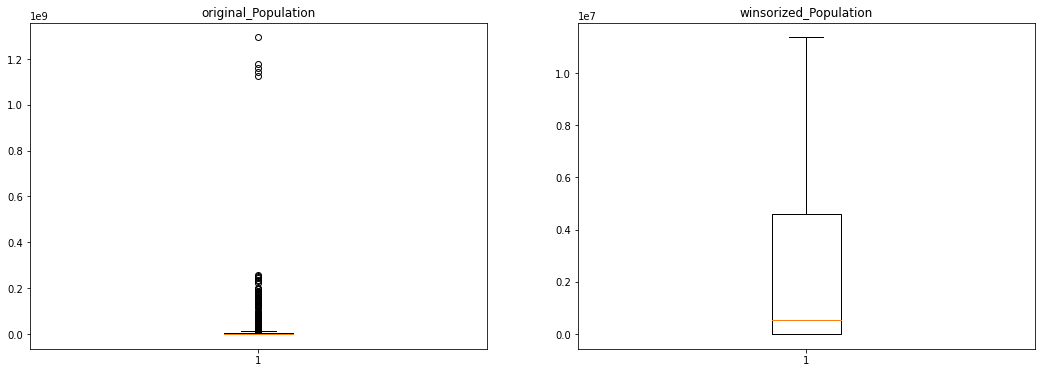

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = Life_Expectancy_Data_df['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(Life_Expectancy_Data_df['Population'],(0,0.15))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

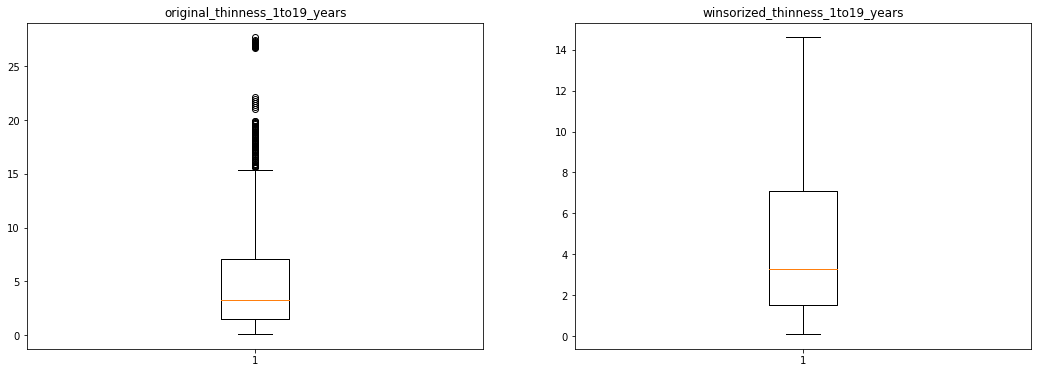

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = Life_Expectancy_Data_df['Thinness 1-19 Years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(Life_Expectancy_Data_df['Thinness 1-19 Years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

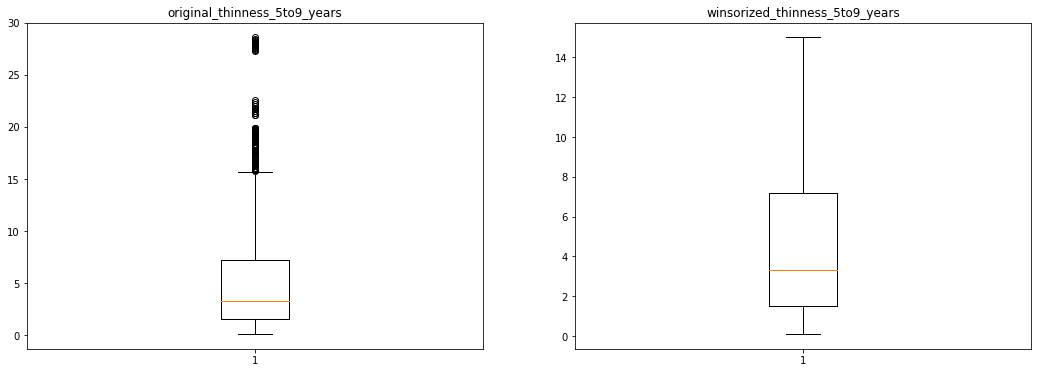

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = Life_Expectancy_Data_df['Thinness 5-9 Years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(Life_Expectancy_Data_df['Thinness 5-9 Years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

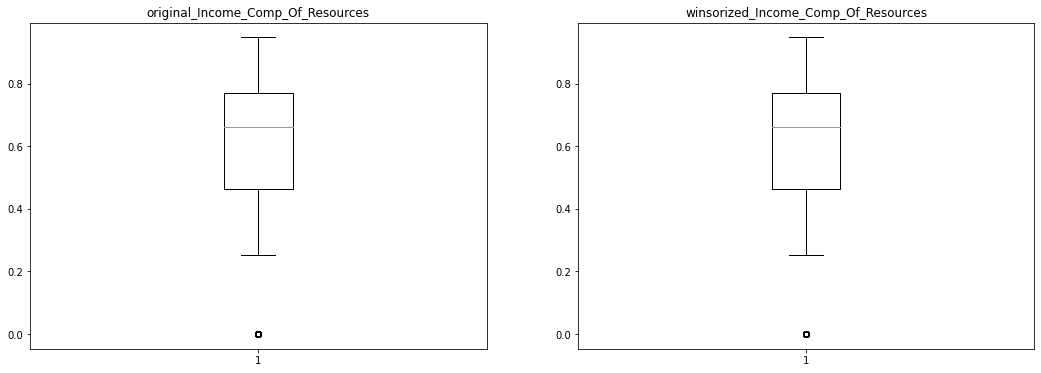

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = Life_Expectancy_Data_df['Income Composition of Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(Life_Expectancy_Data_df['Income Composition of Resources'],(0.1,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

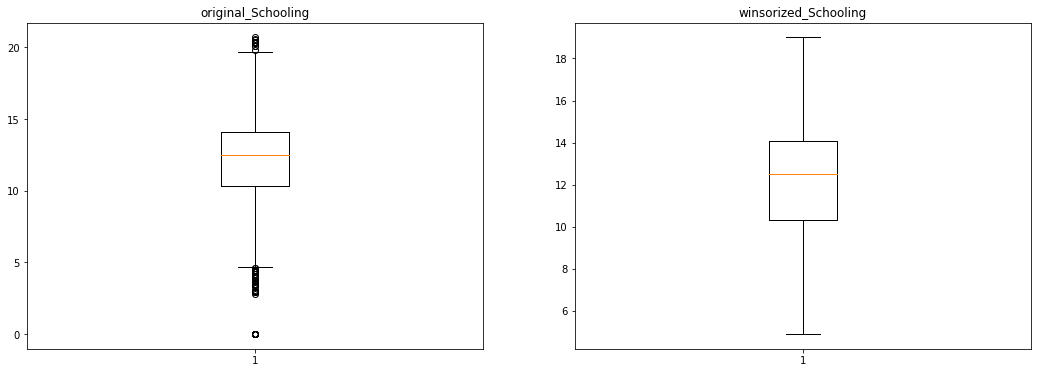

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = Life_Expectancy_Data_df['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(Life_Expectancy_Data_df['Schooling'],(0.025,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [ ]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,
winsorized_Measles,winsorized_Infant_Deaths, winsorized_Percentage_Exp, winsorized_HepatitisB,
winsorized_Under_Five_Deaths, winsorized_Polio, winsorized_Tot_Exp, winsorized_Diphtheria,
winsorized_HIV, winsorized_GDP, winsorized_Population, winsorized_thinness_1to19_years,
winsorized_thinness_5to9_years, winsorized_Income_Comp_Of_Resources, winsorized_Schooling]

name_list = ["winsorized_Life_Expectancy","winsorized_Adult_Mortality","winsorized_Alcohol",
"winsorized_Measles","winsorized_Infant_Deaths", "winsorized_Percentage_Exp", "winsorized_HepatitisB",
"winsorized_Under_Five_Deaths", "winsorized_Polio", "winsorized_Tot_Exp", "winsorized_Diphtheria",
"winsorized_HIV", "winsorized_GDP", "winsorized_Population", "winsorized_thinness_1to19_years",
"winsorized_thinness_5to9_years", "winsorized_Income_Comp_Of_Resources", "winsorized_Schooling"]

for index,variable in enumerate(winsorized_list):
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    #print(variable[i])
    print("Number of outliers after winsorization in {} : {}"
.format(name_list[index],len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization in winsorized_Life_Expectancy : 0
Number of outliers after winsorization in winsorized_Adult_Mortality : 0
Number of outliers after winsorization in winsorized_Alcohol : 0
Number of outliers after winsorization in winsorized_Measles : 0
Number of outliers after winsorization in winsorized_Infant_Deaths : 0
Number of outliers after winsorization in winsorized_Percentage_Exp : 0
Number of outliers after winsorization in winsorized_HepatitisB : 0
Number of outliers after winsorization in winsorized_Under_Five_Deaths : 0
Number of outliers after winsorization in winsorized_Polio : 0
Number of outliers after winsorization in winsorized_Tot_Exp : 0
Number of outliers after winsorization in winsorized_Diphtheria : 0
Number of outliers after winsorization in winsorized_HIV : 0
Number of outliers after winsorization in winsorized_GDP : 0
Number of outliers after winsorization in winsorized_Population : 0
Number of outliers after winsorization in winsorized

Making sure that all outliers have been dealt with.

In [ ]:
Life_Expectancy_Data_df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
Life_Expectancy_Data_df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
Life_Expectancy_Data_df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
Life_Expectancy_Data_df['winsorized_Alcohol'] = winsorized_Alcohol
Life_Expectancy_Data_df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
Life_Expectancy_Data_df['winsorized_HepatitisB'] = winsorized_HepatitisB
Life_Expectancy_Data_df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
Life_Expectancy_Data_df['winsorized_Polio'] = winsorized_Polio
Life_Expectancy_Data_df['winsorized_Tot_Exp'] = winsorized_Tot_Exp
Life_Expectancy_Data_df['winsorized_Diphtheria'] = winsorized_Diphtheria
Life_Expectancy_Data_df['winsorized_HIV'] = winsorized_HIV
Life_Expectancy_Data_df['winsorized_GDP'] = winsorized_GDP
Life_Expectancy_Data_df['winsorized_Population'] = winsorized_Population
Life_Expectancy_Data_df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
Life_Expectancy_Data_df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
Life_Expectancy_Data_df['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
Life_Expectancy_Data_df['winsorized_Schooling'] = winsorized_Schooling
Life_Expectancy_Data_df['winsorized_Measles'] = winsorized_Measles

Life_Expectancy_Data_df

Country  Year  ... winsorized_Schooling  winsorized_Measles
0     Afghanistan  2015  ...                 10.1                 831
1     Afghanistan  2014  ...                 10.0                 492
2     Afghanistan  2013  ...                  9.9                 430
3     Afghanistan  2012  ...                  9.8                 831
4     Afghanistan  2011  ...                  9.5                 831
...           ...   ...  ...                  ...                 ...
2933     Zimbabwe  2004  ...                  9.2                  31
2934     Zimbabwe  2003  ...                  9.5                 831
2935     Zimbabwe  2002  ...                 10.0                 304
2936     Zimbabwe  2001  ...                  9.8                 529
2937     Zimbabwe  2000  ...                  9.8                 831

[2938 rows x 40 columns]

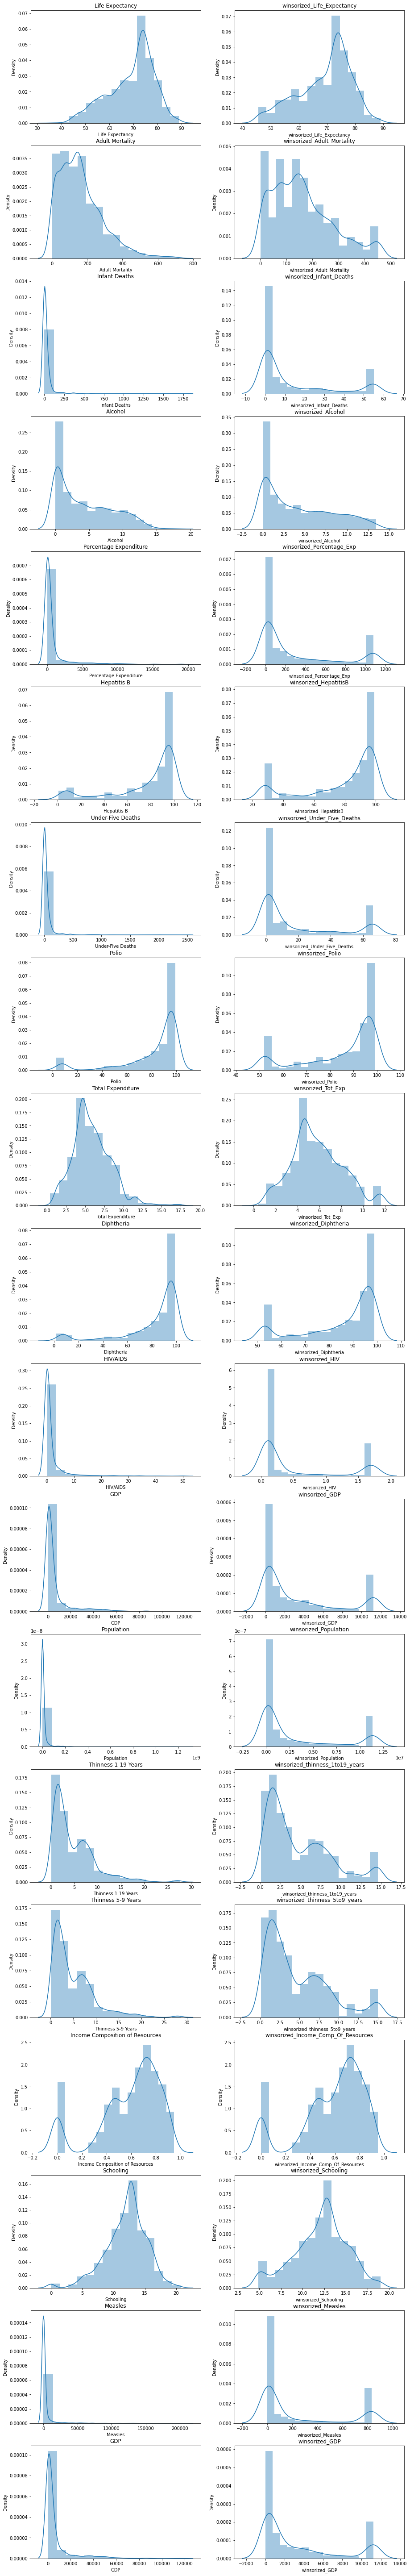

In [ ]:
all_col = ['Life Expectancy','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','Infant Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage Expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','Under-Five Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total Expenditure',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','Thinness 1-19 Years','winsorized_thinness_1to19_years','Thinness 5-9 Years',
         'winsorized_thinness_5to9_years','Income Composition of Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Measles','winsorized_Measles','GDP','winsorized_GDP']

plt.figure(figsize=(15,105))

for i in range(len(all_col)):
  #ax = sns.distplot(world_happiness_report_df["Happiness Score"],bins=10)
    plt.subplot(19,2,i+1)
    sns.distplot(Life_Expectancy_Data_df[all_col[i]],bins= 15)
    plt.title(all_col[i])

plt.show()

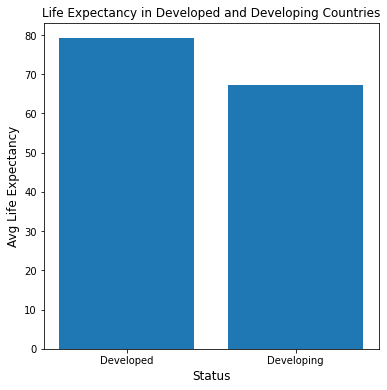

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(Life_Expectancy_Data_df.groupby('Status')['Status'].count().index,Life_Expectancy_Data_df.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy in Developed and Developing Countries")
plt.show()

Checking to see the difference in Average life expectancy between Developed and Developing countries

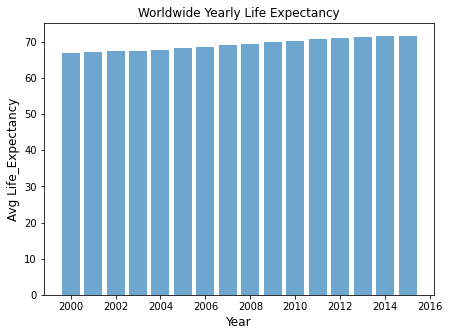

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(Life_Expectancy_Data_df.groupby('Year')['Year'].count().index,Life_Expectancy_Data_df.groupby('Year')['winsorized_Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Worldwide Yearly Life Expectancy")
plt.show()

Finding a correlation between time (in years) and the increase average life expectancy

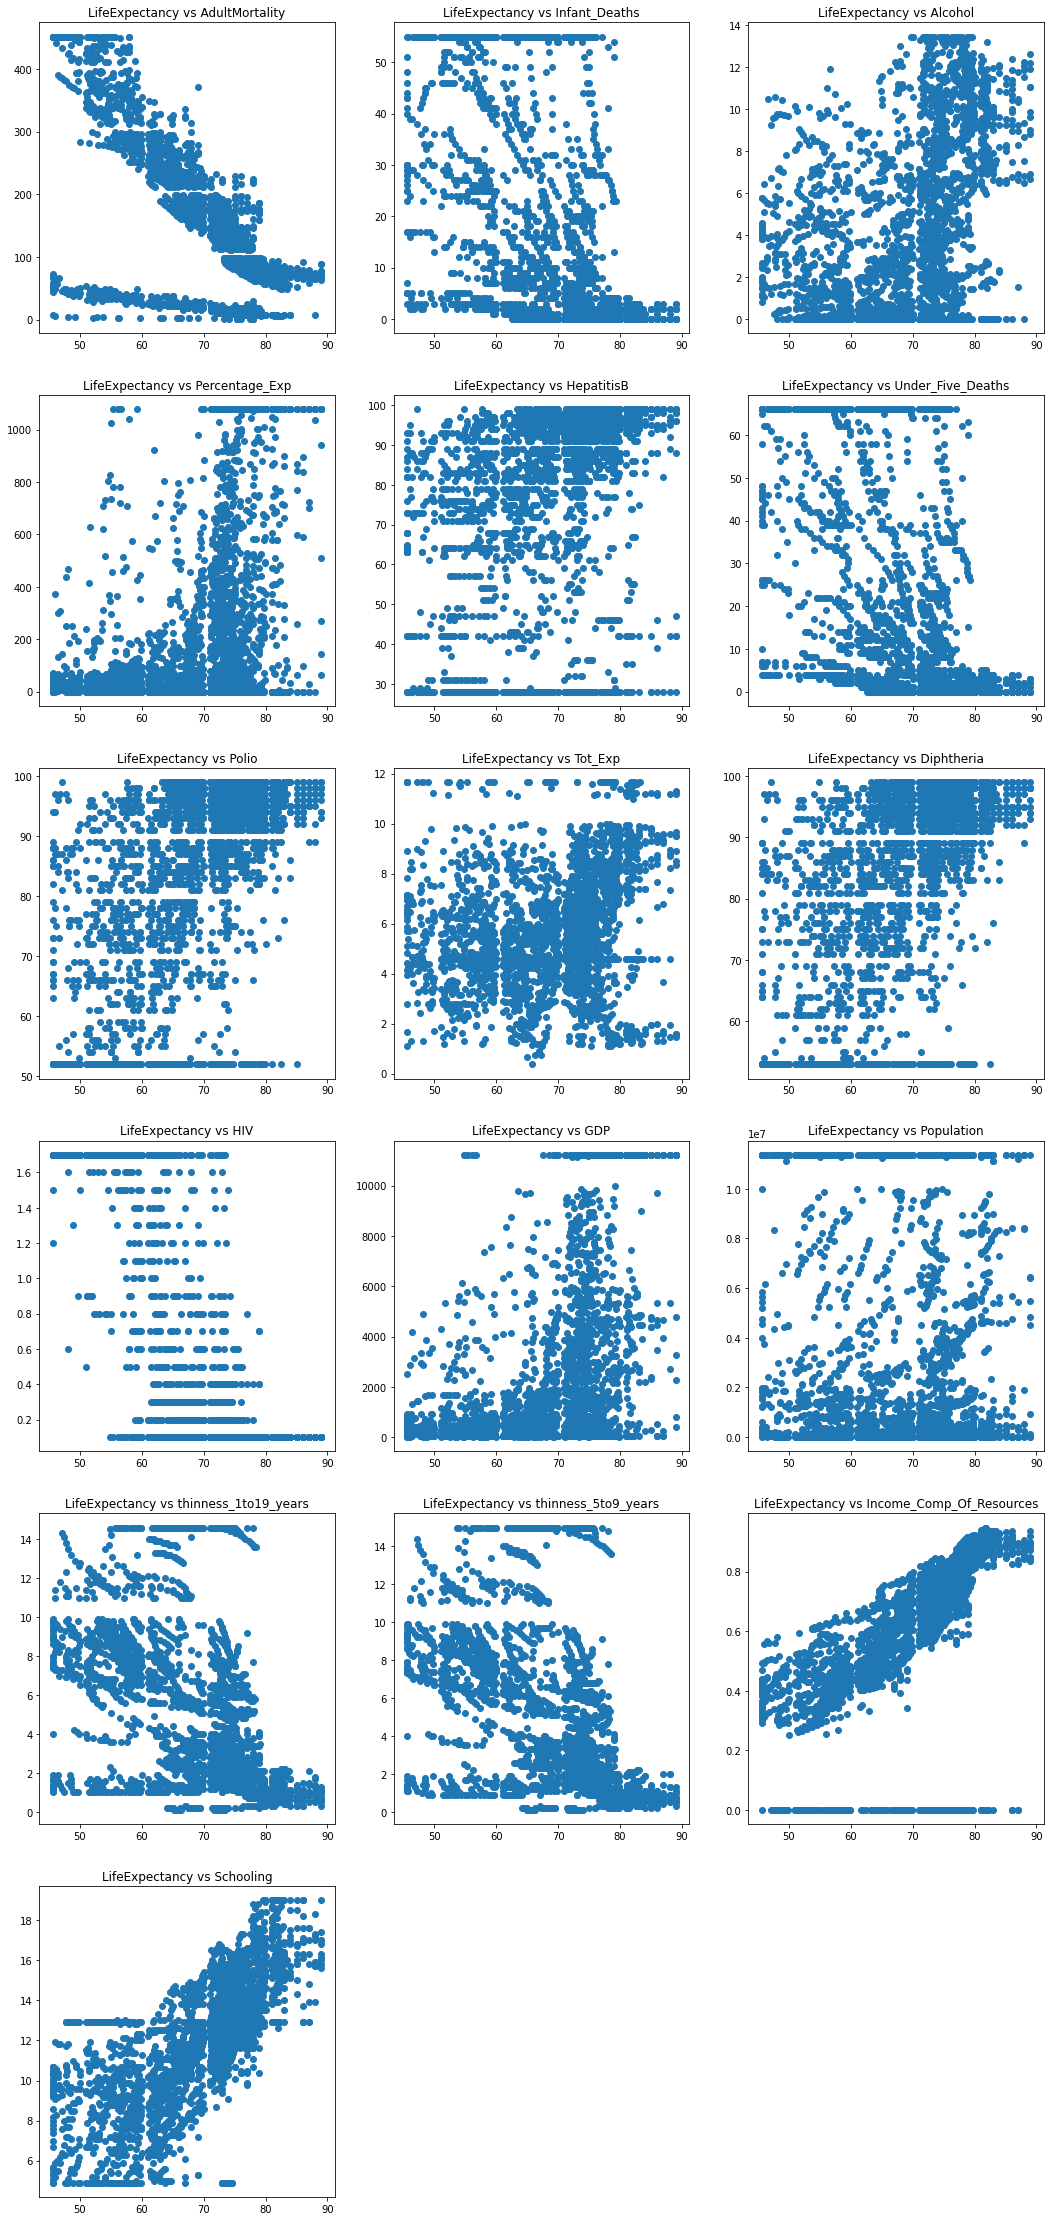

In [ ]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(Life_Expectancy_Data_df["winsorized_Life_Expectancy"], Life_Expectancy_Data_df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

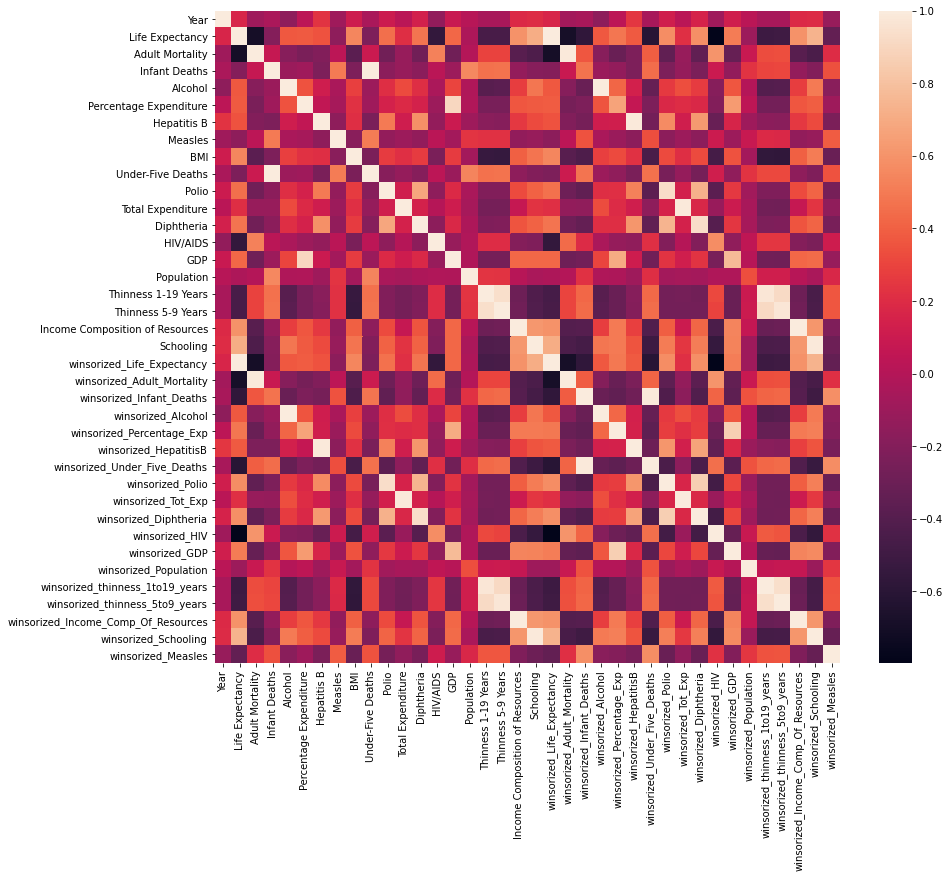

In [ ]:

plt.figure(figsize=(14,12))
sns.heatmap(Life_Expectancy_Data_df.corr())


In [ ]:
Life_Expectancy_Data_df['Life Expectancy'] = winsorized_Life_Expectancy
Life_Expectancy_Data_df['Adult Mortality'] = winsorized_Adult_Mortality
Life_Expectancy_Data_df['Infant Deaths'] = winsorized_Infant_Deaths
Life_Expectancy_Data_df['Alcohol'] = winsorized_Alcohol
Life_Expectancy_Data_df['Percentage Expenditure'] = winsorized_Percentage_Exp
Life_Expectancy_Data_df['HepatitisB'] = winsorized_HepatitisB
Life_Expectancy_Data_df['Under Five Deaths'] = winsorized_Under_Five_Deaths
Life_Expectancy_Data_df['Polio'] = winsorized_Polio
Life_Expectancy_Data_df['Total Expenditure'] = winsorized_Tot_Exp
Life_Expectancy_Data_df['Diphtheria'] = winsorized_Diphtheria
Life_Expectancy_Data_df['HIV/AIDS'] = winsorized_HIV
Life_Expectancy_Data_df['GDP'] = winsorized_GDP
Life_Expectancy_Data_df['Population'] = winsorized_Population
Life_Expectancy_Data_df['Thinness 1-19 Years'] = winsorized_thinness_1to19_years
Life_Expectancy_Data_df['Thinness 5-9 Years'] = winsorized_thinness_5to9_years
Life_Expectancy_Data_df['Income Composition of Resources'] = winsorized_Income_Comp_Of_Resources
Life_Expectancy_Data_df['Schooling'] = winsorized_Schooling
Life_Expectancy_Data_df['Measles'] = winsorized_Measles
Life_Expectancy_Data_df=Life_Expectancy_Data_df.drop([ 'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years',
       'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],axis=1)
Life_Expectancy_Data_df.columns.values

array(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling', 'HepatitisB',
       'Under Five Deaths'], dtype=object)

First we need to import the appropriate libraries that will be used within this dataframe notebook.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We then read the dataframe itself and look at the top 10 rows to get an idea of what the dataframe is representing.

In [ ]:
df_250_countries = pd.read_csv("250 Country Data.csv")
df_250_countries.head(10)

Unnamed: 0  ...                                   Unemployement(%)
0           0  ...                                   35% (2008 est.).
1           1  ...                                                NaN
2           2  ...  16.9% official rate (2013 est.). Note: These a...
3           3  ...                                             10.3%.
4           4  ...                                                NaN
5           5  ...                                    4% (2012 est.).
6           6  ...                                               n.a.
7           7  ...                                         8% (2002).
8           8  ...                                                NaN
9           9  ...                                   11% (2001 est.).

[10 rows x 11 columns]

We notice that the there are multiple columns with missing values as well as multiple columns with more than one data type in their corresponding rows, so we get the information on the dataframe to see the data types and the number of the non-null values in each column.

In [ ]:
print(df_250_countries.shape)
df_250_countries.info()

(250, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             250 non-null    int64  
 1   name                   250 non-null    object 
 2   region                 248 non-null    object 
 3   subregion              247 non-null    object 
 4   population             250 non-null    int64  
 5   area                   240 non-null    float64
 6   gini                   153 non-null    float64
 7   Real Growth Rating(%)  171 non-null    object 
 8   Literacy Rate(%)       176 non-null    object 
 9   Inflation(%)           168 non-null    object 
 10  Unemployement(%)       168 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 21.6+ KB


We correct the datatypes and format in the Real Growth Rating, Literacy Rate, Inflation, Unemployement columns by using regular expressions.

In [ ]:
df_250_countries['Real Growth Rating(%)'] = df_250_countries['Real Growth Rating(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df_250_countries['Literacy Rate(%)'] = df_250_countries['Literacy Rate(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df_250_countries['Inflation(%)'] = df_250_countries['Inflation(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
df_250_countries['Unemployement(%)'] = df_250_countries['Unemployement(%)'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)

In [ ]:
df_250_countries

Unnamed: 0               name  ... Inflation(%) Unemployement(%)
0             0        Afghanistan  ...          6.8             35.0
1             1      Åland Islands  ...          NaN              NaN
2             2            Albania  ...          1.7             16.9
3             3            Algeria  ...          3.9             10.3
4             4     American Samoa  ...          NaN              NaN
..          ...                ...  ...          ...              ...
245         245  Wallis and Futuna  ...          NaN              NaN
246         246     Western Sahara  ...          NaN              NaN
247         247              Yemen  ...         11.8             35.0
248         248             Zambia  ...          7.1             15.0
249         249           Zimbabwe  ...          NaN              NaN

[250 rows x 11 columns]

We remove the rows with an NaN value in their region column, there are only 2 such rows so the missing data is an acceptable loss.

In [ ]:
df_250_countries[df_250_countries['region'].notna()]

Unnamed: 0               name  ... Inflation(%) Unemployement(%)
0             0        Afghanistan  ...          6.8             35.0
1             1      Åland Islands  ...          NaN              NaN
2             2            Albania  ...          1.7             16.9
3             3            Algeria  ...          3.9             10.3
4             4     American Samoa  ...          NaN              NaN
..          ...                ...  ...          ...              ...
245         245  Wallis and Futuna  ...          NaN              NaN
246         246     Western Sahara  ...          NaN              NaN
247         247              Yemen  ...         11.8             35.0
248         248             Zambia  ...          7.1             15.0
249         249           Zimbabwe  ...          NaN              NaN

[248 rows x 11 columns]

We then group the dataframe by the region column in order to better analyse data from a similar aspect.

In [ ]:
regions_df = df_250_countries.groupby('region')

We check the number of unique regions within the dataframe in order to create sub-dataframes of each region. This will enable us to impute the missing values in each column with a more relevant dataframe for each set of imputations.

In [ ]:
regions_df.region.unique()

region
Africa        [Africa]
Americas    [Americas]
Asia            [Asia]
Europe        [Europe]
Oceania      [Oceania]
Polar          [Polar]
Name: region, dtype: object

In [ ]:
asia_region = regions_df.get_group('Asia')
europe_region = regions_df.get_group('Europe')
africa_region = regions_df.get_group('Africa')
oceania_region = regions_df.get_group('Oceania')
americas_region = regions_df.get_group('Americas')
polar_region = regions_df.get_group('Polar')

In [ ]:
print(asia_region.shape)
asia_region.info()

(50, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 247
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50 non-null     int64  
 1   name                   50 non-null     object 
 2   region                 50 non-null     object 
 3   subregion              50 non-null     object 
 4   population             50 non-null     int64  
 5   area                   49 non-null     float64
 6   gini                   39 non-null     float64
 7   Real Growth Rating(%)  37 non-null     float64
 8   Literacy Rate(%)       38 non-null     float64
 9   Inflation(%)           37 non-null     float64
 10  Unemployement(%)       37 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.7+ KB


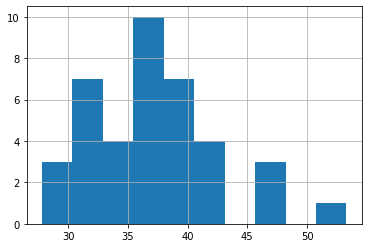

In [ ]:
asia_region['gini'].hist()

In [ ]:
asia_region['gini'].mode()

0    30.9
1    36.7
2    38.1
dtype: float64

In [ ]:
asia_region.fillna({'gini':asia_region['gini'].mode().iloc[1]}, inplace = True)

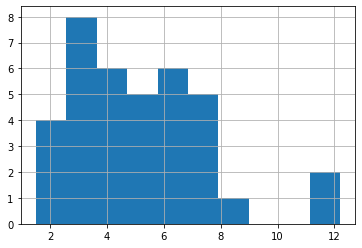

In [ ]:
asia_region['Real Growth Rating(%)'].hist()

In [ ]:
asia_region['Real Growth Rating(%)'].mode()

0    3.6
1    5.8
dtype: float64

In [ ]:
asia_region.fillna({'Real Growth Rating(%)':asia_region['Real Growth Rating(%)'].mode().iloc[0]}, inplace=True)

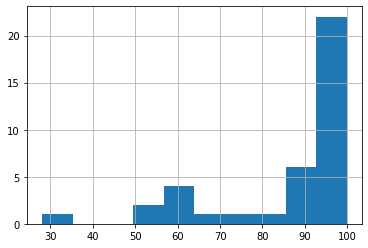

In [ ]:
asia_region['Literacy Rate(%)'].hist()

In [ ]:
asia_region['Literacy Rate(%)'].mode()

0    99.7
dtype: float64

In [ ]:
asia_region.fillna({'Literacy Rate(%)':asia_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
asia_region['Inflation(%)'].mode()

0    2.2
1    3.7
2    6.8
3    7.6
4    7.7
dtype: float64

In [ ]:
asia_region.fillna({'Inflation(%)':asia_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

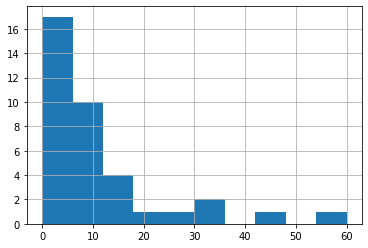

In [ ]:
asia_region['Unemployement(%)'].hist()

In [ ]:
asia_region['Unemployement(%)'].mode(dropna=True)

0     4.1
1     6.6
2    35.0
dtype: float64

We now need to merge all of the three dataframes to have one dataframe with all of the columns of the three datasets so we can start asking our questions

In [ ]:
asia_region.fillna({'area': 0}, inplace=True)

In [ ]:
print(europe_region.shape)
europe_region.info()

(53, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 238
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             53 non-null     int64  
 1   name                   53 non-null     object 
 2   region                 53 non-null     object 
 3   subregion              53 non-null     object 
 4   population             53 non-null     int64  
 5   area                   52 non-null     float64
 6   gini                   37 non-null     float64
 7   Real Growth Rating(%)  38 non-null     float64
 8   Literacy Rate(%)       37 non-null     float64
 9   Inflation(%)           37 non-null     float64
 10  Unemployement(%)       37 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.0+ KB


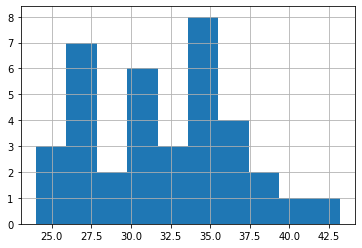

In [ ]:
europe_region['gini'].hist()

In [ ]:
asia_region['gini'].mean()

36.95

In [ ]:
europe_region.fillna({'gini':europe_region['gini'].mean()}, inplace = True)

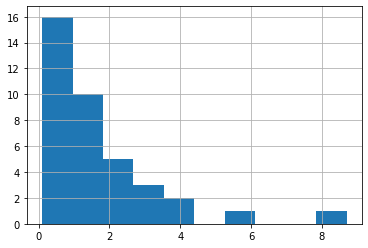

In [ ]:
europe_region['Real Growth Rating(%)'].hist()

In [ ]:
europe_region['Real Growth Rating(%)'].mode()

0    0.4
1    0.5
2    0.9
dtype: float64

In [ ]:
europe_region.fillna({'Real Growth Rating(%)':europe_region['Real Growth Rating(%)'].mode().iloc[0]}, inplace = True)

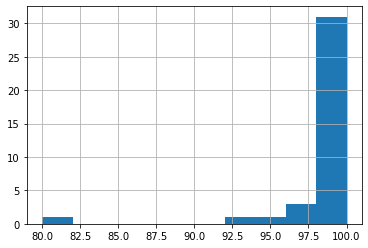

In [ ]:
europe_region['Literacy Rate(%)'].hist()

In [ ]:
europe_region['Literacy Rate(%)'].mode()

0    99.0
dtype: float64

In [ ]:
europe_region.fillna({'Literacy Rate(%)':europe_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

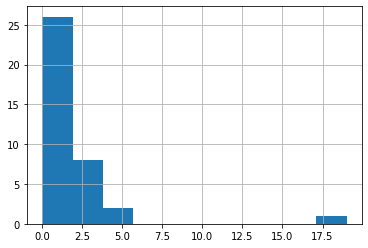

In [ ]:
europe_region['Inflation(%)'].hist()

In [ ]:
europe_region['Inflation(%)'].mode()

0    0.7
1    1.5
dtype: float64

In [ ]:
europe_region.fillna({'Inflation(%)':europe_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

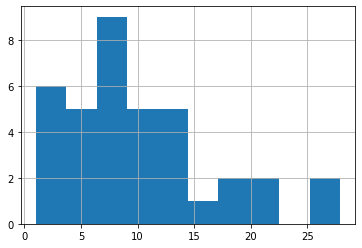

In [ ]:
europe_region['Unemployement(%)'].hist()

In [ ]:
europe_region['Unemployement(%)'].mean()

10.202702702702705

In [ ]:
europe_region.fillna({'Unemployement(%)':europe_region['Unemployement(%)'].mean()}, inplace = True)

In [ ]:
europe_region.fillna({'area':0}, inplace = True)

In [ ]:
print(africa_region.shape)
africa_region.info()

(60, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 3 to 249
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60 non-null     int64  
 1   name                   60 non-null     object 
 2   region                 60 non-null     object 
 3   subregion              60 non-null     object 
 4   population             60 non-null     int64  
 5   area                   57 non-null     float64
 6   gini                   46 non-null     float64
 7   Real Growth Rating(%)  44 non-null     float64
 8   Literacy Rate(%)       48 non-null     float64
 9   Inflation(%)           41 non-null     float64
 10  Unemployement(%)       29 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02055242e8>,
      dtype=object)

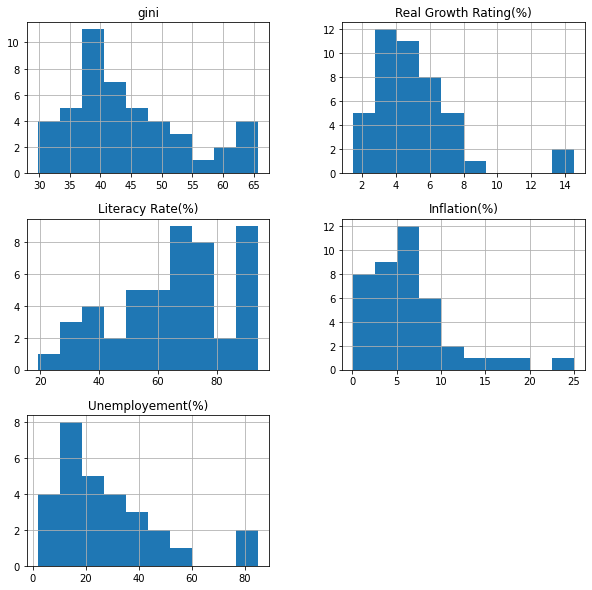

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
africa_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

In [ ]:
africa_region['gini'].mode()

0    35.3
1    39.8
2    41.5
3    50.8
dtype: float64

In [ ]:
africa_region.fillna({'gini':africa_region['gini'].mode().iloc[1]}, inplace = True)

In [ ]:
africa_region['Real Growth Rating(%)'].mean()

5.165909090909091

In [ ]:
africa_region.fillna({'Real Growth Rating(%)':africa_region['Real Growth Rating(%)'].mean()}, inplace = True)

In [ ]:
africa_region['Literacy Rate(%)'].mode()

0    88.8
dtype: float64

In [ ]:
africa_region.fillna({'Literacy Rate(%)':africa_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
africa_region['Inflation(%)'].mode()

0    5.8
1    6.1
2    7.0
3    7.1
dtype: float64

In [ ]:
africa_region.fillna({'Inflation(%)':africa_region['Inflation(%)'].mode().iloc[1]}, inplace = True)

In [ ]:
africa_region['Unemployement(%)'].mode()

0    30.0
dtype: float64

In [ ]:
africa_region.fillna({'Unemployement(%)':africa_region['Unemployement(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
africa_region.fillna({'area':0}, inplace = True)

In [ ]:
africa_region

Unnamed: 0  ... Unemployement(%)
3             3  ...             10.3
6             6  ...             30.0
23           23  ...             30.0
29           29  ...             17.8
32           32  ...             30.0
38           38  ...             77.0
39           39  ...             30.0
41           41  ...             30.0
43           43  ...             30.0
45           45  ...              8.0
46           46  ...             30.0
52           52  ...             30.0
53           53  ...             30.0
54           54  ...             30.0
63           63  ...             59.0
67           67  ...             13.4
69           69  ...             22.3
70           70  ...             30.0
72           72  ...             17.5
80           80  ...             30.0
81           81  ...             21.0
82           82  ...             30.0
85           85  ...             11.0
94           94  ...             30.0
95           95  ...             30.0
106         106  ...             30.0
118         118  ...             40.0
125         125  ...             25.0
126         126  ...             85.0
127         127  ...             30.0
133         133  ...             30.0
134         134  ...             30.0
137         137  ...             30.0
141         141  ...             30.0
142         142  ...              8.3
143         143  ...             38.0
151         151  ...              9.9
152         152  ...             17.0
154         154  ...             51.2
161         161  ...             30.0
162         162  ...             23.9
183         183  ...             36.0
186         186  ...             30.0
188         188  ...             30.0
196         196  ...             30.0
198         198  ...             48.0
200         200  ...              2.0
201         201  ...             30.0
207         207  ...             30.0
208         208  ...             30.0
211         211  ...             30.0
214         214  ...             20.0
217         217  ...             30.0
223         223  ...             30.0
226         226  ...             30.0
230         230  ...             17.2
235         235  ...             30.0
246         246  ...             30.0
248         248  ...             15.0
249         249  ...             30.0

[60 rows x 11 columns]

In [ ]:
print(oceania_region.shape)
oceania_region.info()

(27, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 4 to 245
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27 non-null     int64  
 1   name                   27 non-null     object 
 2   region                 27 non-null     object 
 3   subregion              27 non-null     object 
 4   population             27 non-null     int64  
 5   area                   27 non-null     float64
 6   gini                   4 non-null      float64
 7   Real Growth Rating(%)  14 non-null     float64
 8   Literacy Rate(%)       14 non-null     float64
 9   Inflation(%)           16 non-null     float64
 10  Unemployement(%)       13 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02098567f0>,
      dtype=object)

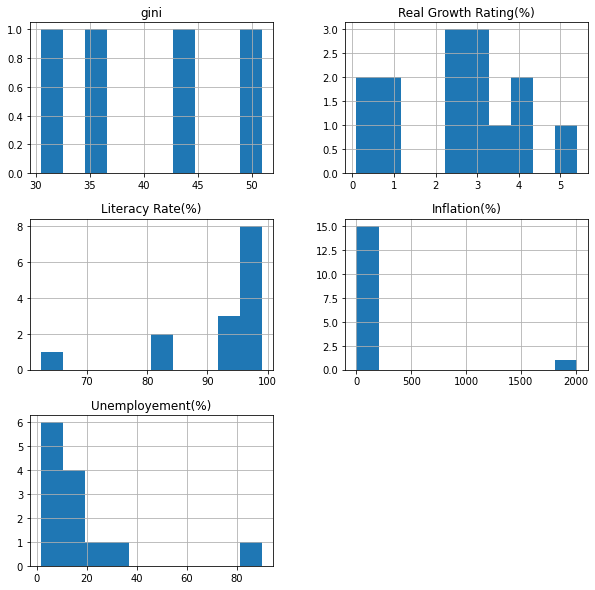

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
oceania_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

In [ ]:
oceania_region['gini'].mean()

40.1

In [ ]:
oceania_region.fillna({'gini':oceania_region['gini'].mean()}, inplace = True)

In [ ]:
oceania_region['Real Growth Rating(%)'].mean()

2.564285714285714

In [ ]:
oceania_region.fillna({'Real Growth Rating(%)':oceania_region['Real Growth Rating(%)'].mean()}, inplace = True)

In [ ]:
oceania_region['Literacy Rate(%)'].mode()

0    99.0
dtype: float64

In [ ]:
oceania_region.fillna({'Literacy Rate(%)':oceania_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
oceania_region['Inflation(%)'].mode()

0    2.7
1    3.8
dtype: float64

In [ ]:
oceania_region.fillna({'Inflation(%)':oceania_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
oceania_region['Unemployement(%)'].mode()

0      1.70
1      1.90
2      2.00
3      5.70
4      6.43
5      7.60
6     11.20
7     11.40
8     13.00
9     17.10
10    21.80
11    36.00
12    90.00
dtype: float64

In [ ]:
oceania_region.fillna({'Unemployement(%)':oceania_region['Unemployement(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
print(americas_region.shape)
americas_region.info()

(57, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 7 to 243
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             57 non-null     int64  
 1   name                   57 non-null     object 
 2   region                 57 non-null     object 
 3   subregion              57 non-null     object 
 4   population             57 non-null     int64  
 5   area                   52 non-null     float64
 6   gini                   27 non-null     float64
 7   Real Growth Rating(%)  32 non-null     float64
 8   Literacy Rate(%)       36 non-null     float64
 9   Inflation(%)           33 non-null     float64
 10  Unemployement(%)       34 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0206560eb8>,
      dtype=object)

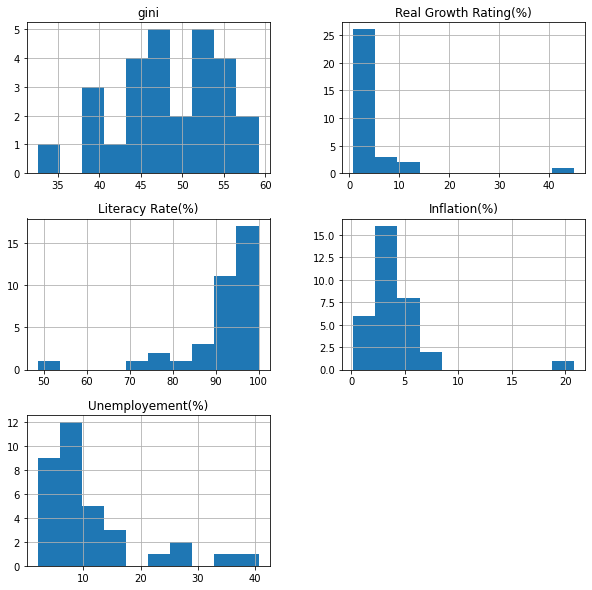

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
americas_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

In [ ]:
americas_region['gini'].mean()

48.703703703703695

In [ ]:
americas_region.fillna({'gini':americas_region['gini'].mean()}, inplace = True)

In [ ]:
americas_region['Real Growth Rating(%)'].mode()

0    3.5
dtype: float64

In [ ]:
americas_region.fillna({'Real Growth Rating(%)':americas_region['Real Growth Rating(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
americas_region['Literacy Rate(%)'].mode()

0    98.0
dtype: float64

In [ ]:
americas_region.fillna({'Literacy Rate(%)':americas_region['Literacy Rate(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
americas_region['Inflation(%)'].mode()

0    2.8
dtype: float64

In [ ]:
americas_region.fillna({'Inflation(%)':americas_region['Inflation(%)'].mode().iloc[0]}, inplace = True)

In [ ]:
americas_region['Unemployement(%)'].mode()

0     4.1
1     4.5
2     6.0
3    11.0
dtype: float64

In [ ]:
americas_region.fillna({'Unemployement(%)':americas_region['Unemployement(%)'].mode().iloc[1]}, inplace = True)

In [ ]:
americas_region.fillna({'area':0}, inplace = True)

When looking at the information of the polar region we can see that there is only one row within the dataframe and that row has multiple null values, since it would be impossible to create a distribution metric for only one value per column we will instead drop the polar region sub-dataframe altogether as its loss is of little significance.

In [ ]:
print(polar_region.shape)
polar_region.info()

(1, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 8 to 8
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1 non-null      int64  
 1   name                   1 non-null      object 
 2   region                 1 non-null      object 
 3   subregion              0 non-null      object 
 4   population             1 non-null      int64  
 5   area                   1 non-null      float64
 6   gini                   0 non-null      float64
 7   Real Growth Rating(%)  0 non-null      float64
 8   Literacy Rate(%)       0 non-null      float64
 9   Inflation(%)           0 non-null      float64
 10  Unemployement(%)       0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 96.0+ bytes


In [ ]:
polar_region

Unnamed: 0        name  ... Inflation(%) Unemployement(%)
8           8  Antarctica  ...          NaN              NaN

[1 rows x 11 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020569bef0>,
      dtype=object)

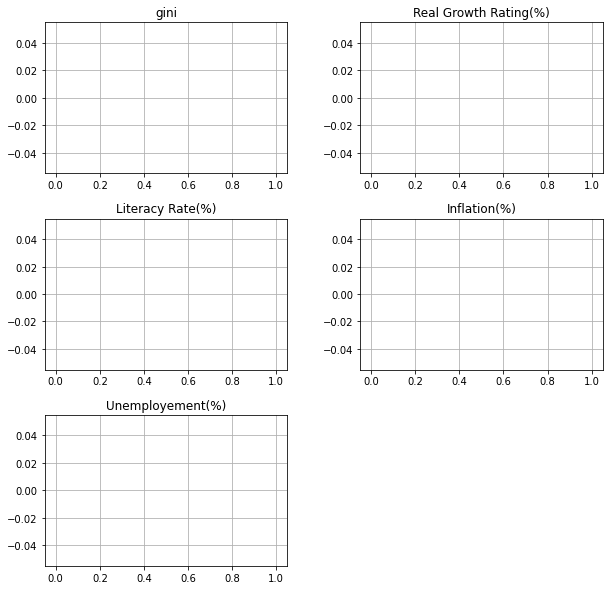

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
polar_region.hist(column = ['gini','Real Growth Rating(%)','Literacy Rate(%)','Inflation(%)','Unemployement(%)'], ax = ax)

We will now begin the outlier handling of each sub-dataframe by first checking for the number of outlier values in each numerical column of each dataframe. We do ths by first getting boxplot representations of each column in each sub-dataframe and counting the number of outliers in each.

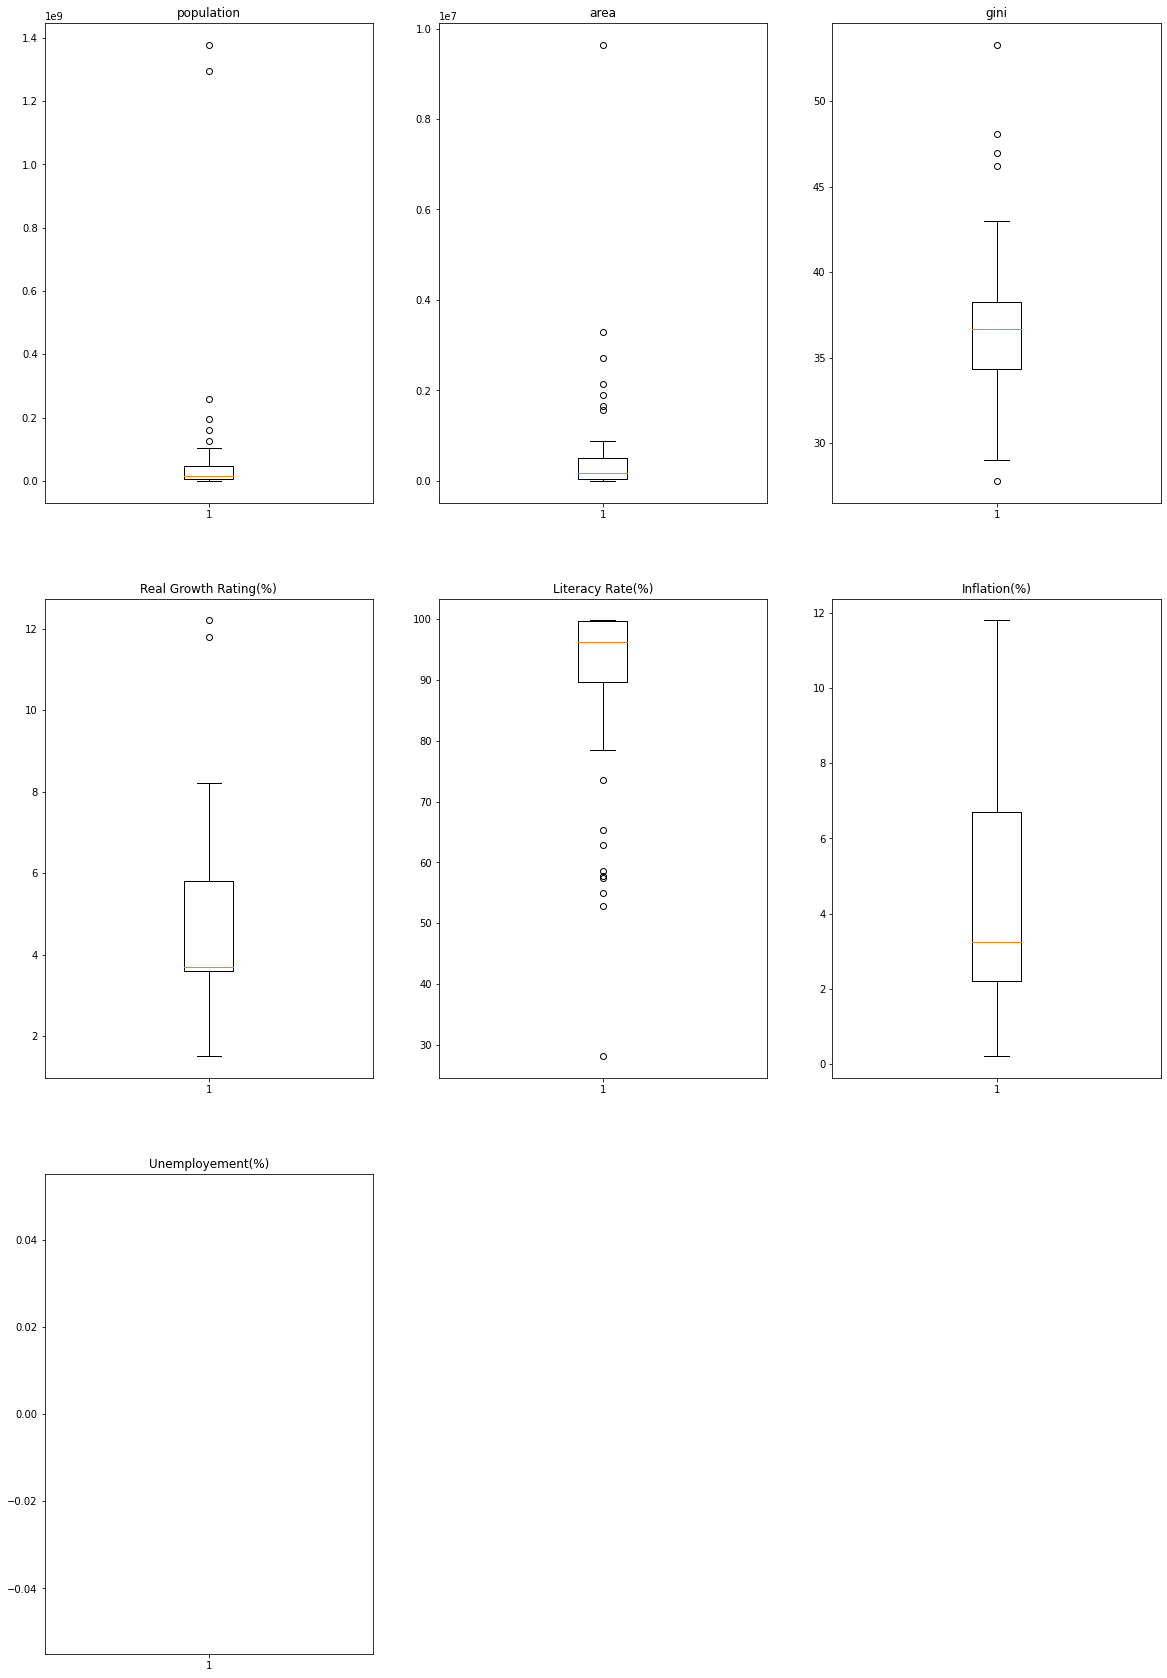

In [ ]:
#df_dict = {'asia_region': 1, 'europe_region': 2, 'africa_region': 3, 'oceania_region': 4, 'americas_region': 5}
col_dict = {'population':1 , 'area':2 ,
        'gini':3 , 'Real Growth Rating(%)': 4, 'Literacy Rate(%)': 5,
       'Inflation(%)' : 6, 'Unemployement(%)': 7}

plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(asia_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(asia_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((asia_region[variable] > max_val) | (asia_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 6
Number of outliers and percentage of it in area : 7
Number of outliers and percentage of it in gini : 5
Number of outliers and percentage of it in Real Growth Rating(%) : 2
Number of outliers and percentage of it in Literacy Rate(%) : 9
Number of outliers and percentage of it in Inflation(%) : 0
Number of outliers and percentage of it in Unemployement(%) : 0


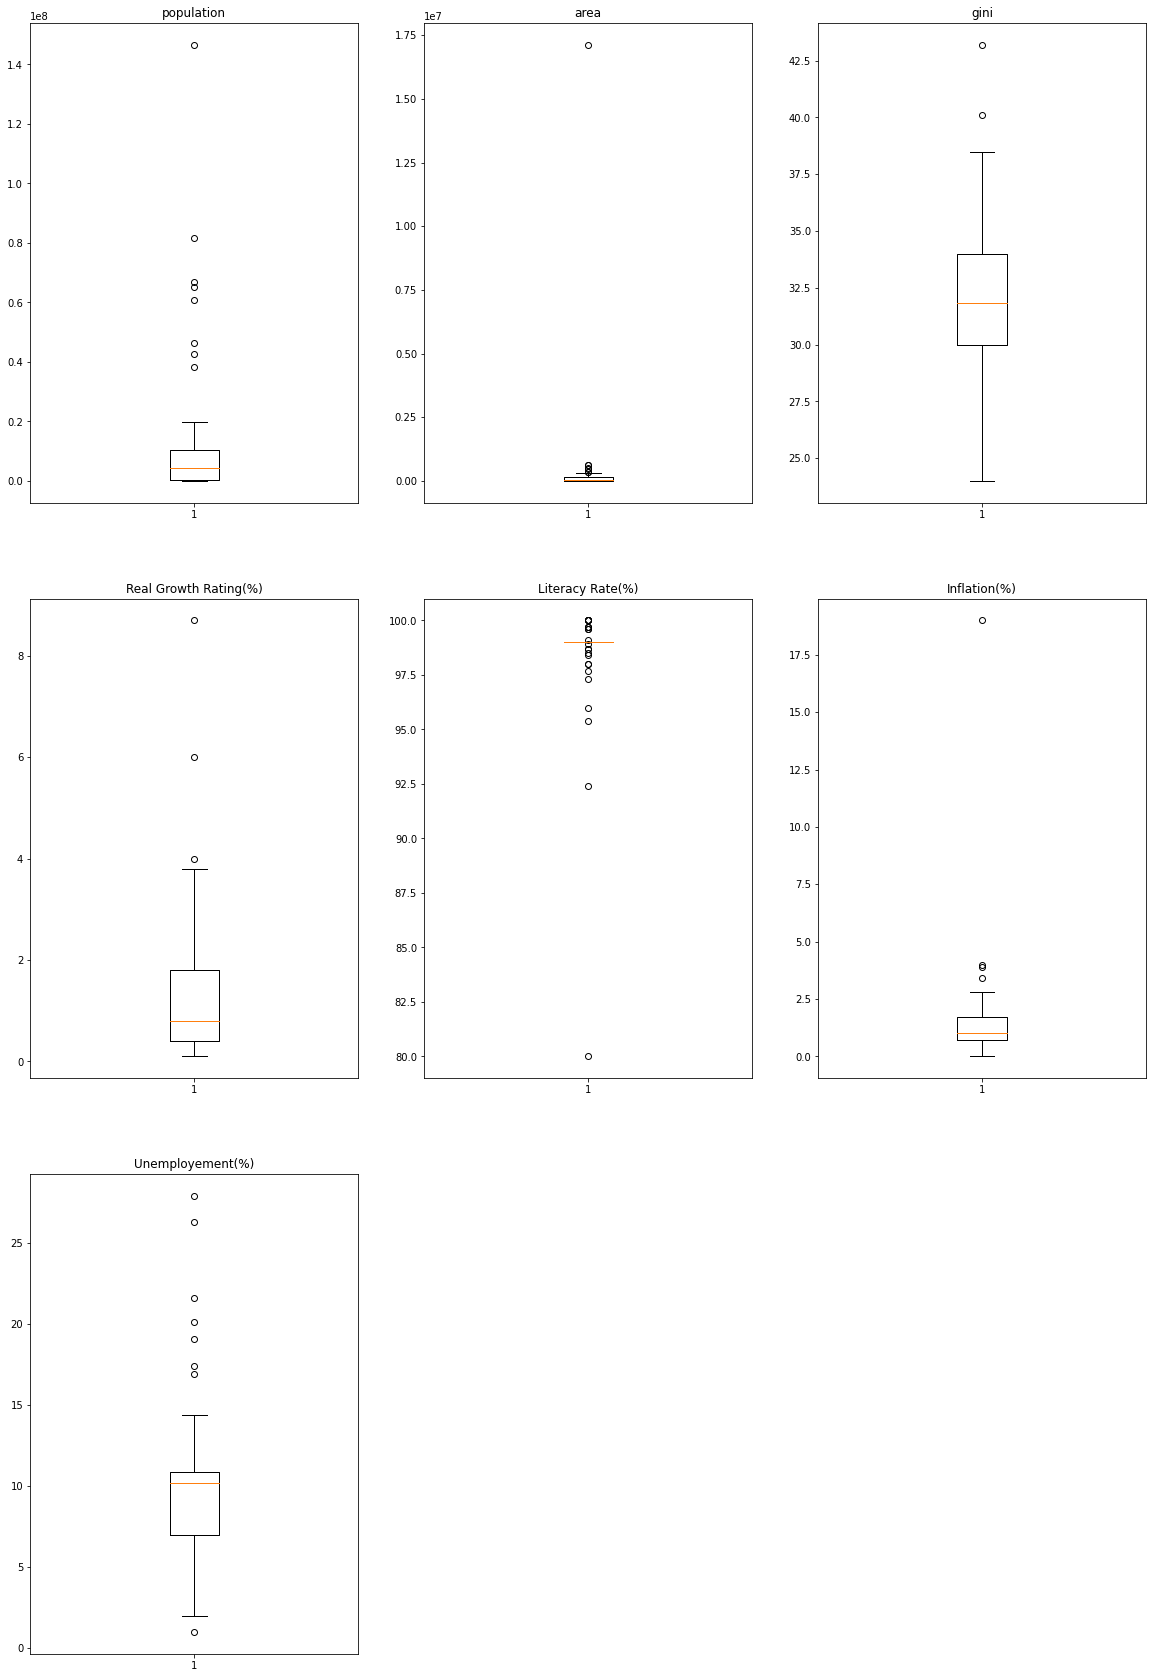

In [ ]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(europe_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(europe_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((europe_region[variable] > max_val) | (europe_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 8
Number of outliers and percentage of it in area : 7
Number of outliers and percentage of it in gini : 2
Number of outliers and percentage of it in Real Growth Rating(%) : 3
Number of outliers and percentage of it in Literacy Rate(%) : 24
Number of outliers and percentage of it in Inflation(%) : 4
Number of outliers and percentage of it in Unemployement(%) : 8


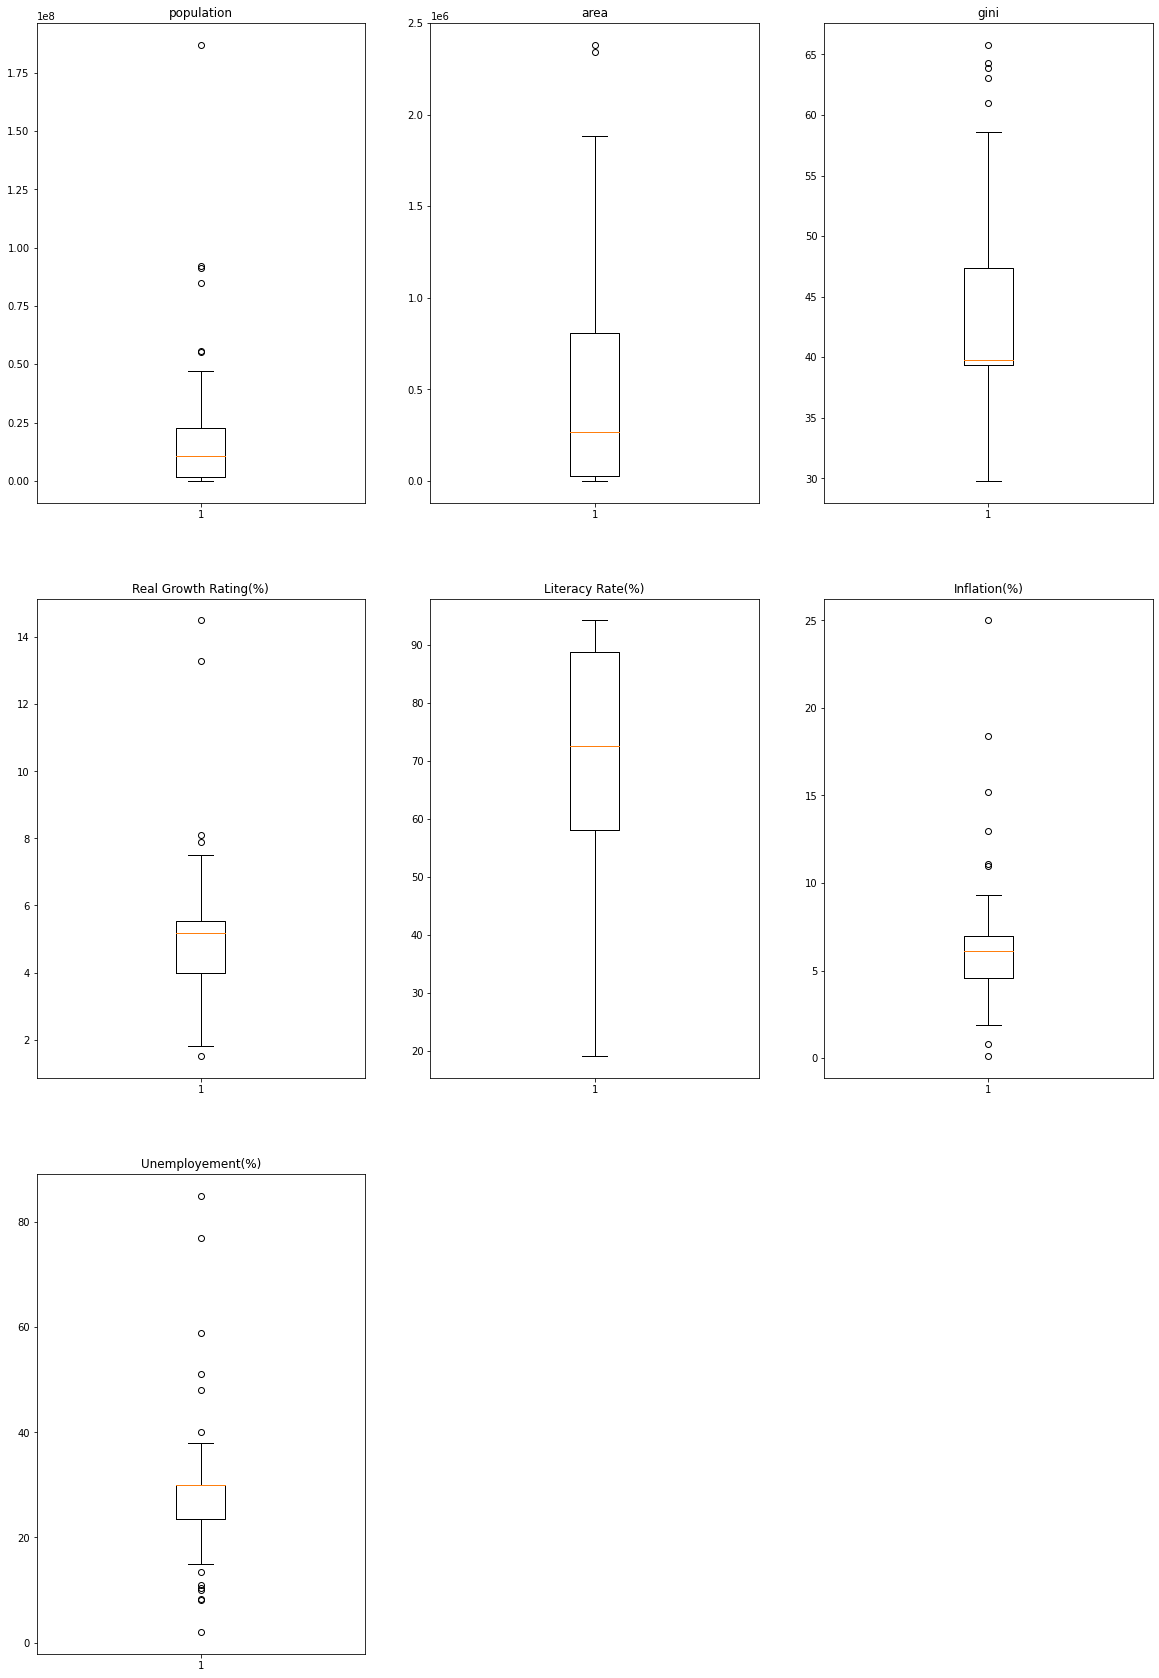

In [ ]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(africa_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(africa_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((africa_region[variable] > max_val) | (africa_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 6
Number of outliers and percentage of it in area : 2
Number of outliers and percentage of it in gini : 5
Number of outliers and percentage of it in Real Growth Rating(%) : 5
Number of outliers and percentage of it in Literacy Rate(%) : 0
Number of outliers and percentage of it in Inflation(%) : 8
Number of outliers and percentage of it in Unemployement(%) : 13


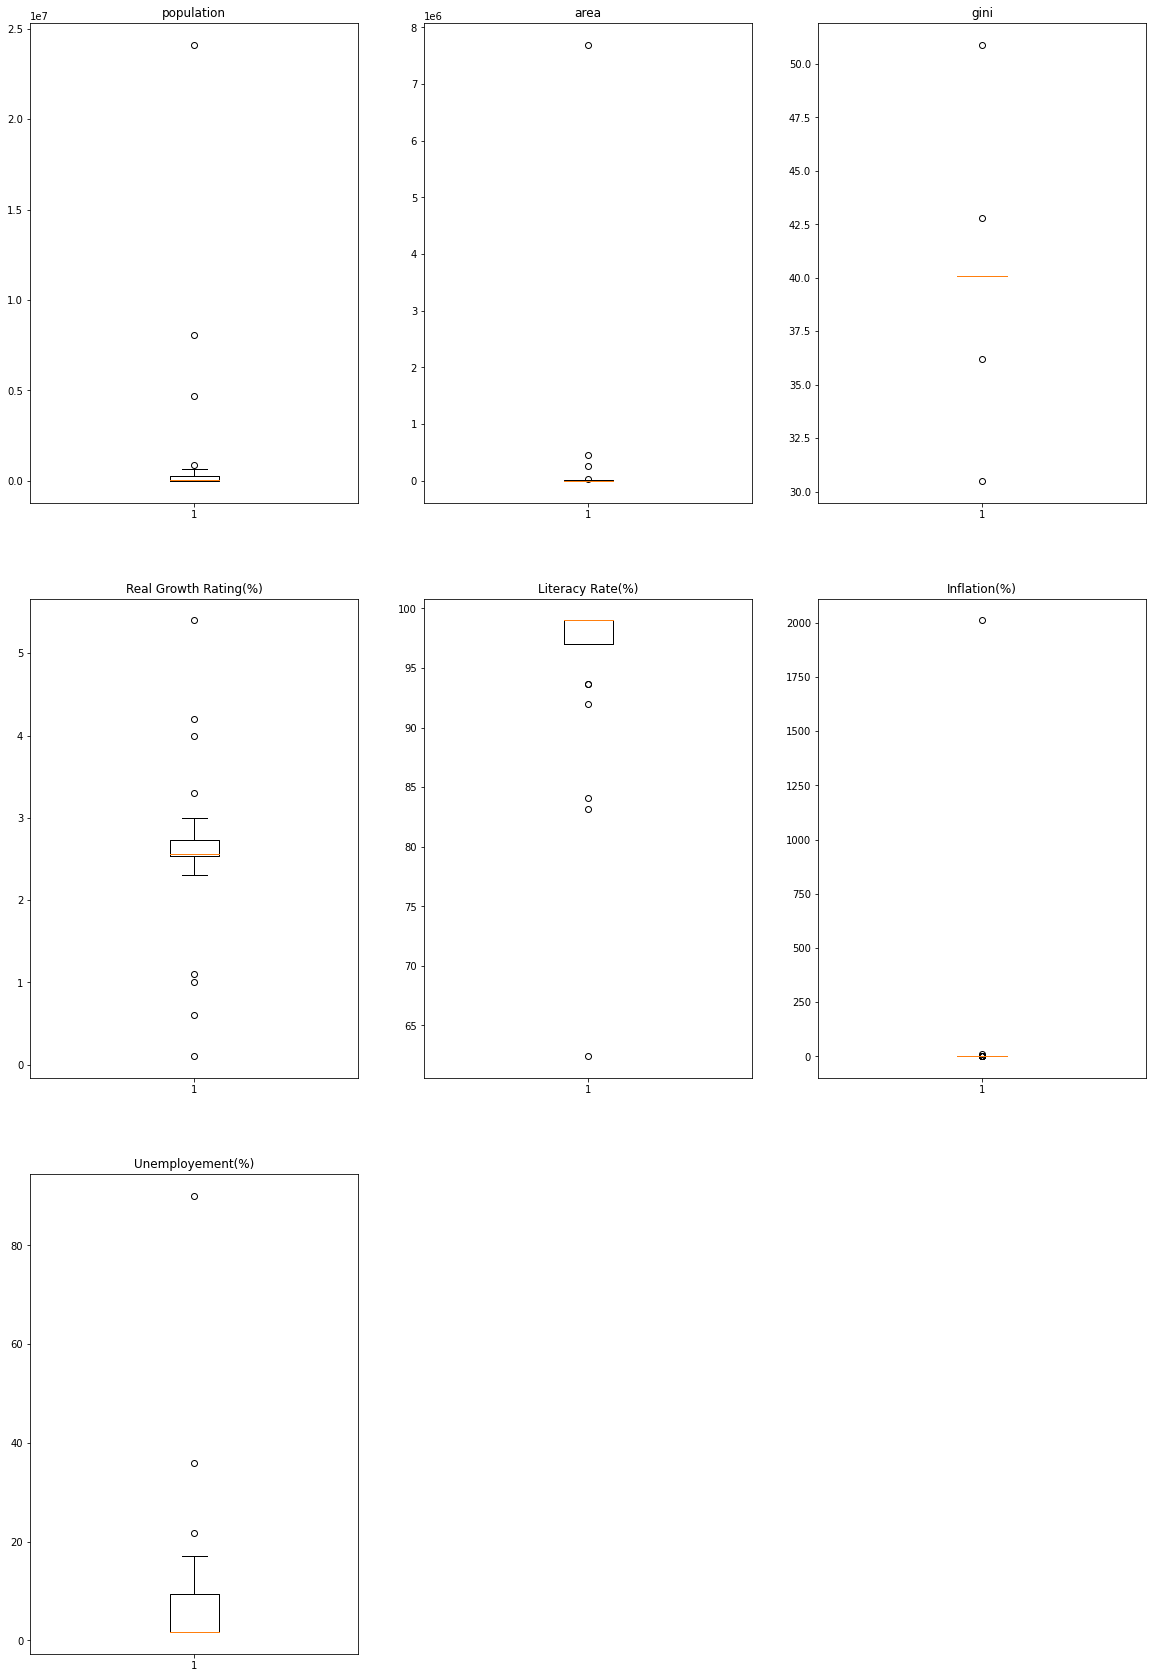

In [ ]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(oceania_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(oceania_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((oceania_region[variable] > max_val) | (oceania_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 4
Number of outliers and percentage of it in area : 4
Number of outliers and percentage of it in gini : 4
Number of outliers and percentage of it in Real Growth Rating(%) : 8
Number of outliers and percentage of it in Literacy Rate(%) : 6
Number of outliers and percentage of it in Inflation(%) : 10
Number of outliers and percentage of it in Unemployement(%) : 3


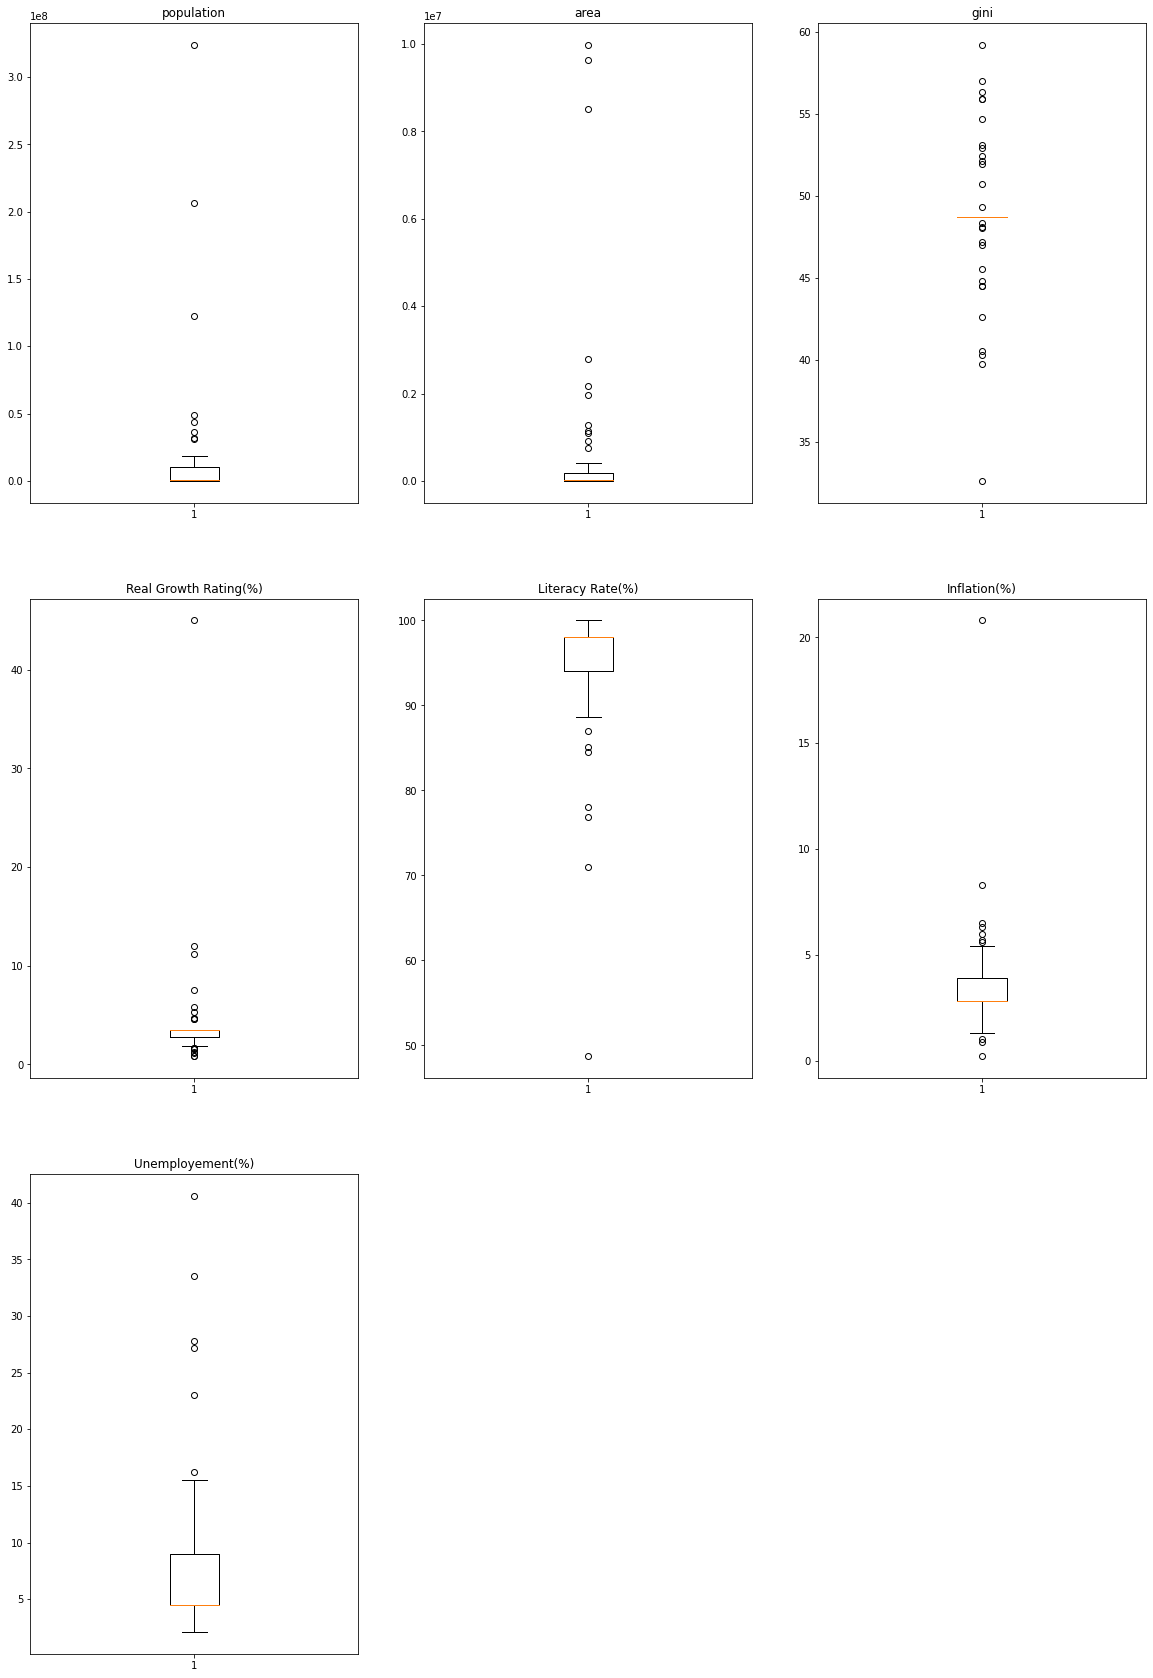

In [ ]:
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
    plt.subplot(3,3,i)
    plt.boxplot(americas_region[variable],whis=1.5)
    plt.title(variable)

plt.show()

In [ ]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(americas_region[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {}".format(variable, 
      len((np.where((americas_region[variable] > max_val) | (americas_region[variable] < min_val))[0]))))

Number of outliers and percentage of it in population : 8
Number of outliers and percentage of it in area : 11
Number of outliers and percentage of it in gini : 27
Number of outliers and percentage of it in Real Growth Rating(%) : 17
Number of outliers and percentage of it in Literacy Rate(%) : 7
Number of outliers and percentage of it in Inflation(%) : 10
Number of outliers and percentage of it in Unemployement(%) : 6


We then use Winsorization to remove the effect of the outliers for each set of columns in a sub-dataframe.

In [ ]:
from scipy.stats.mstats import winsorize

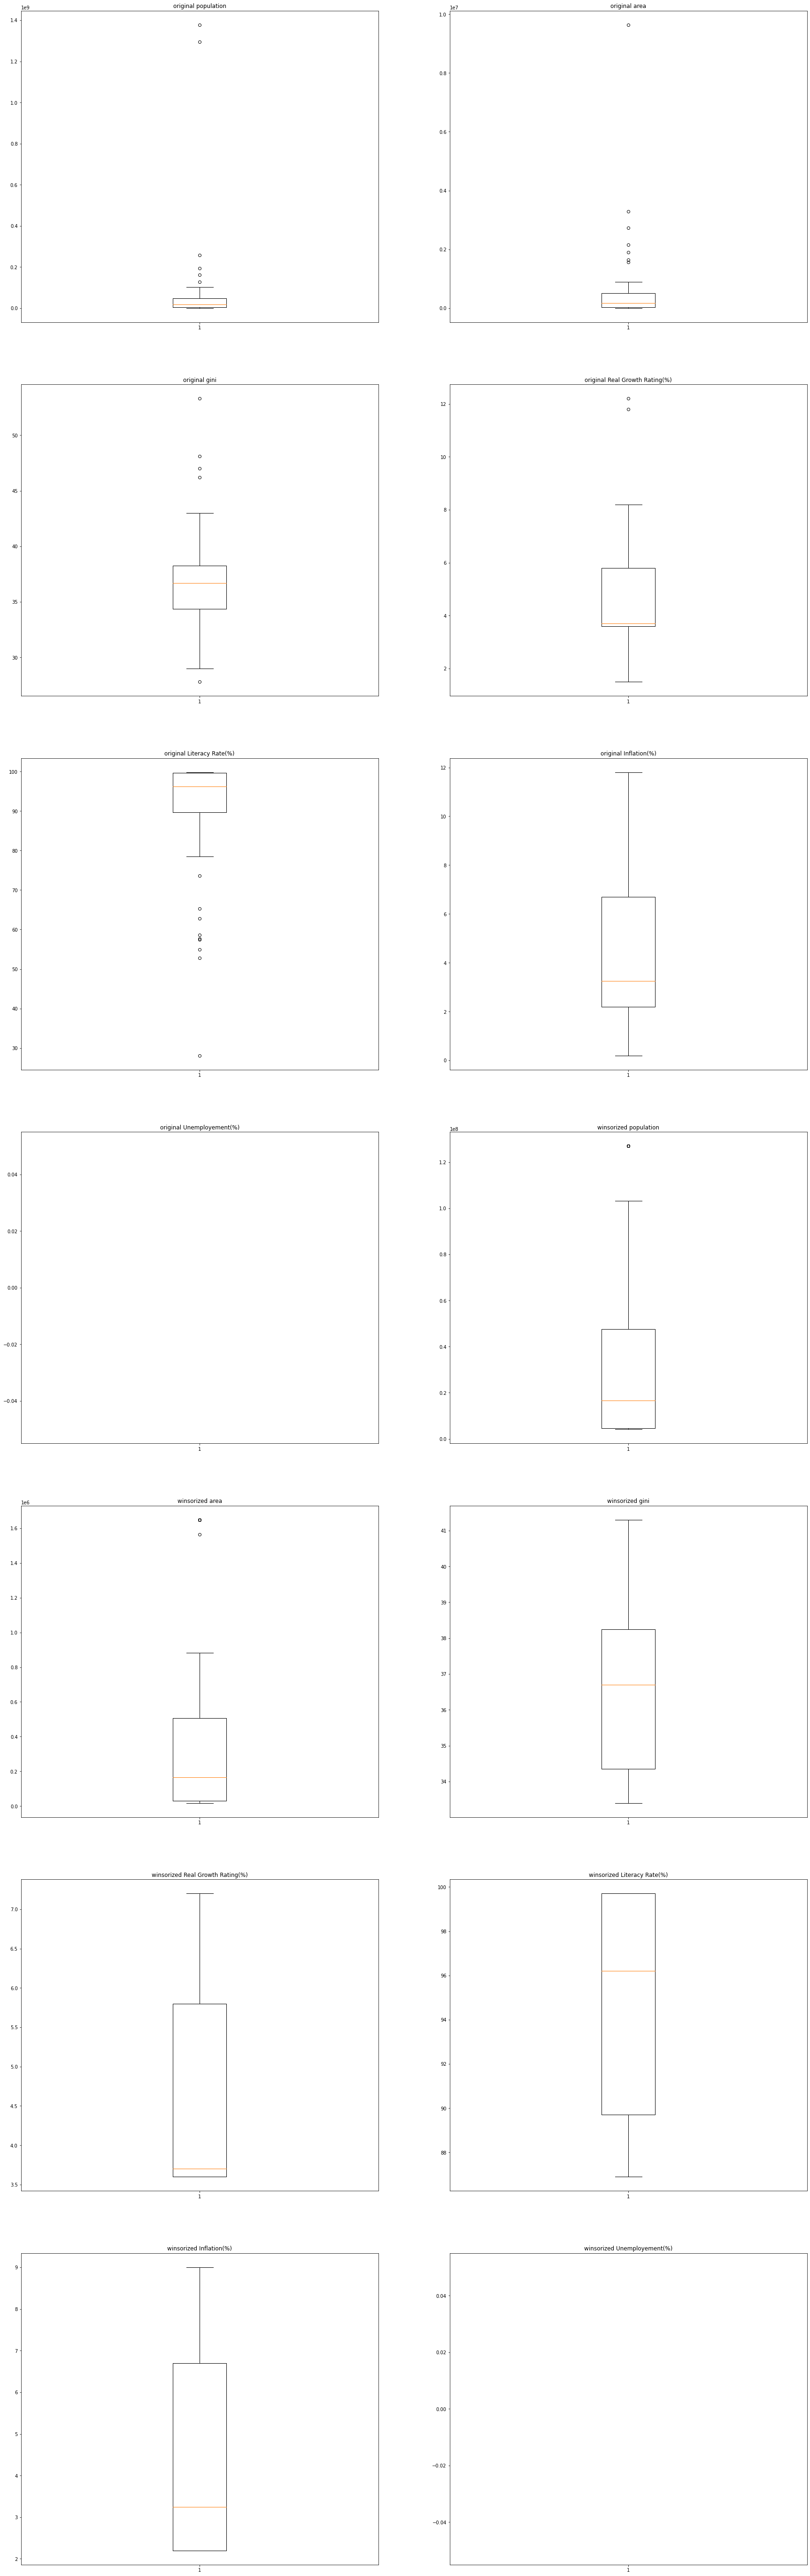

In [ ]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = asia_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(asia_region[variable],(0.2,0.1))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

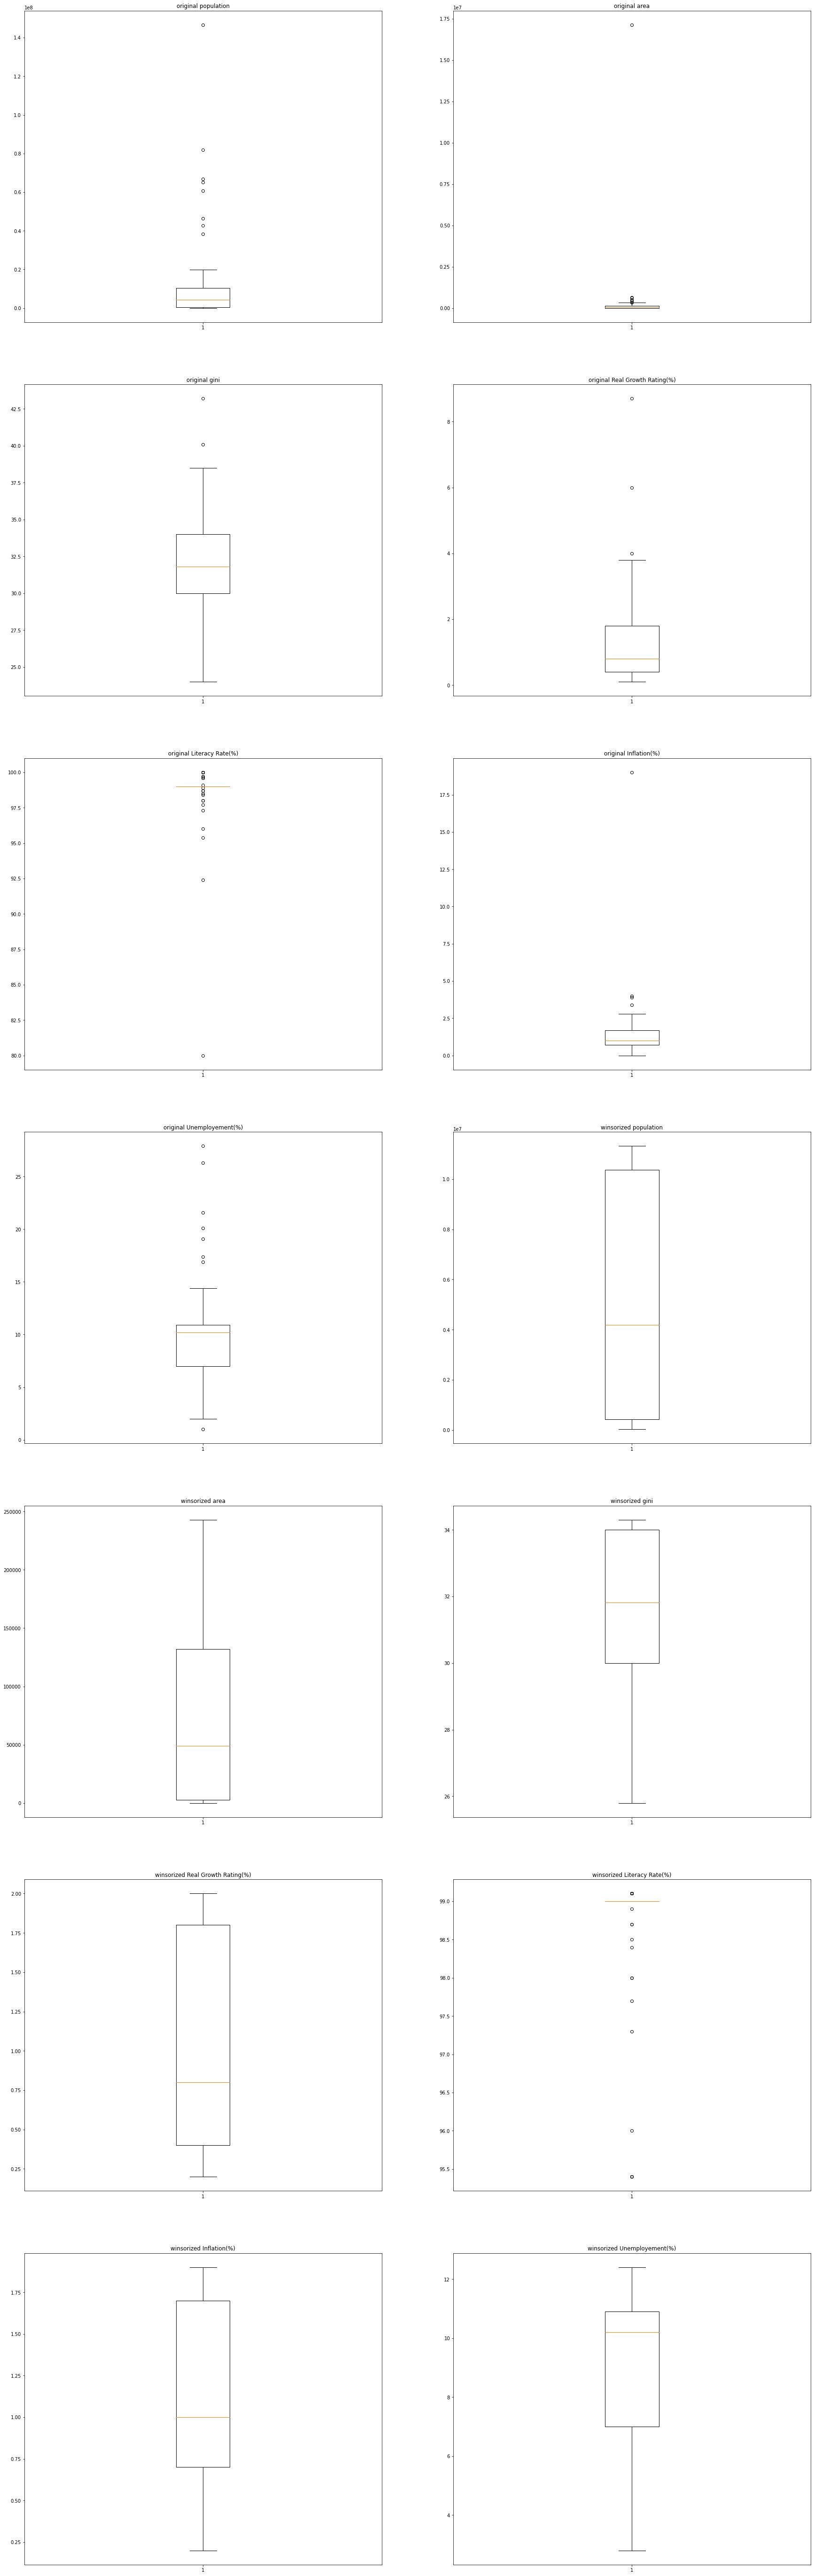

In [ ]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = europe_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(europe_region[variable],(0.05,0.2))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

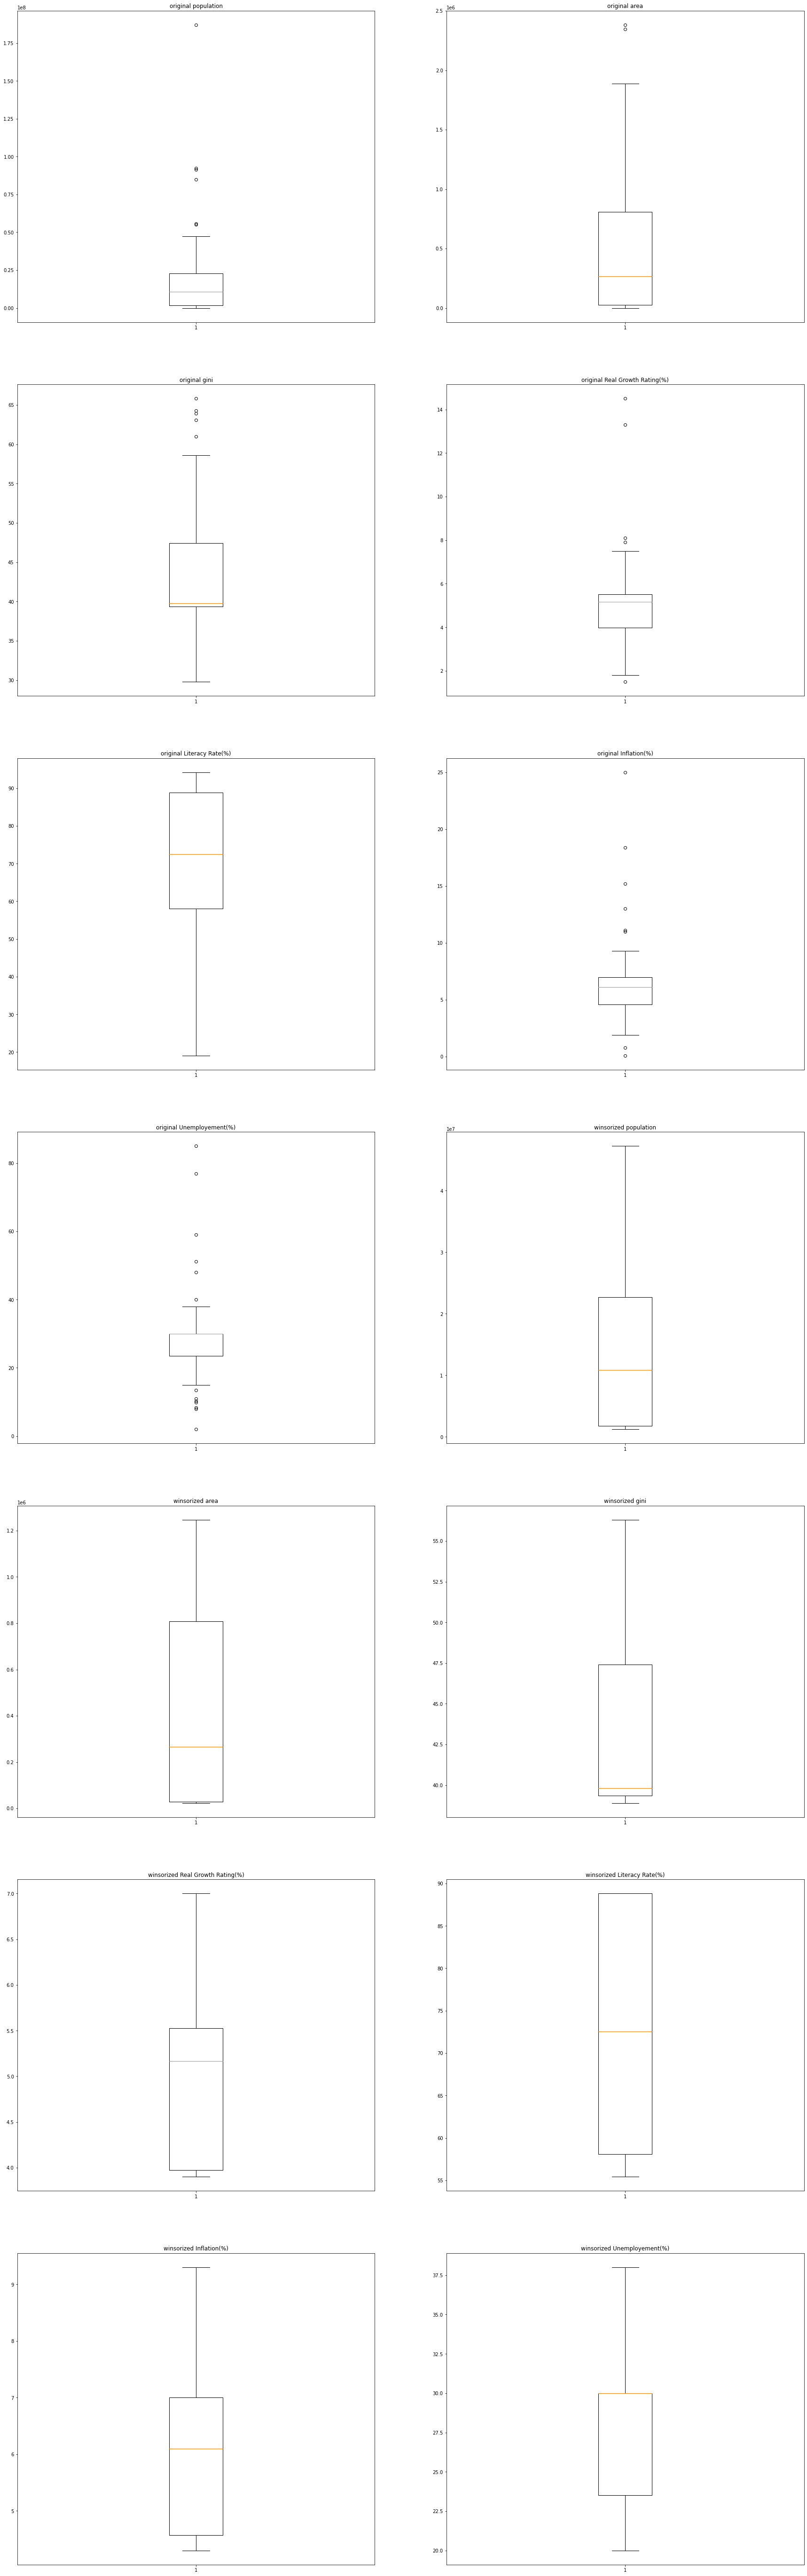

In [ ]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = africa_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(africa_region[variable],(0.2,0.1))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

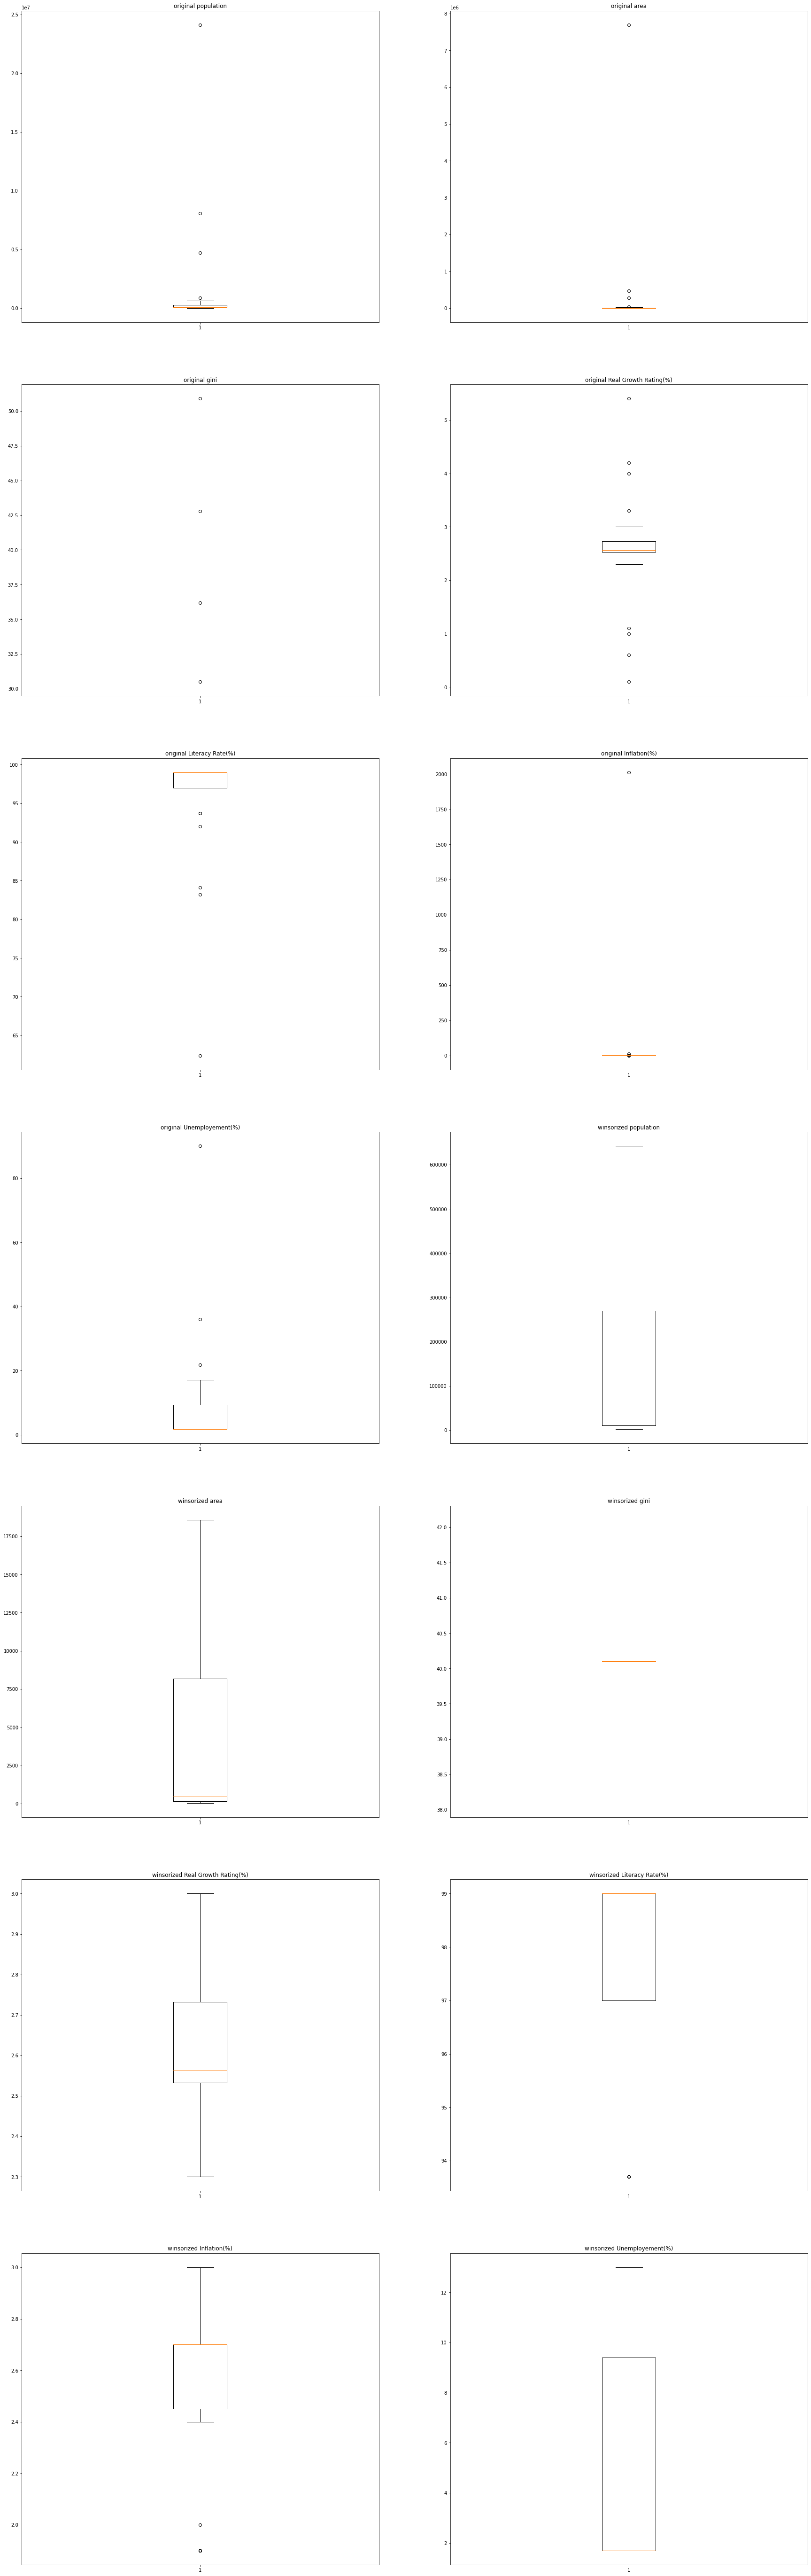

In [ ]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = oceania_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(oceania_region[variable],(0.15,0.15))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

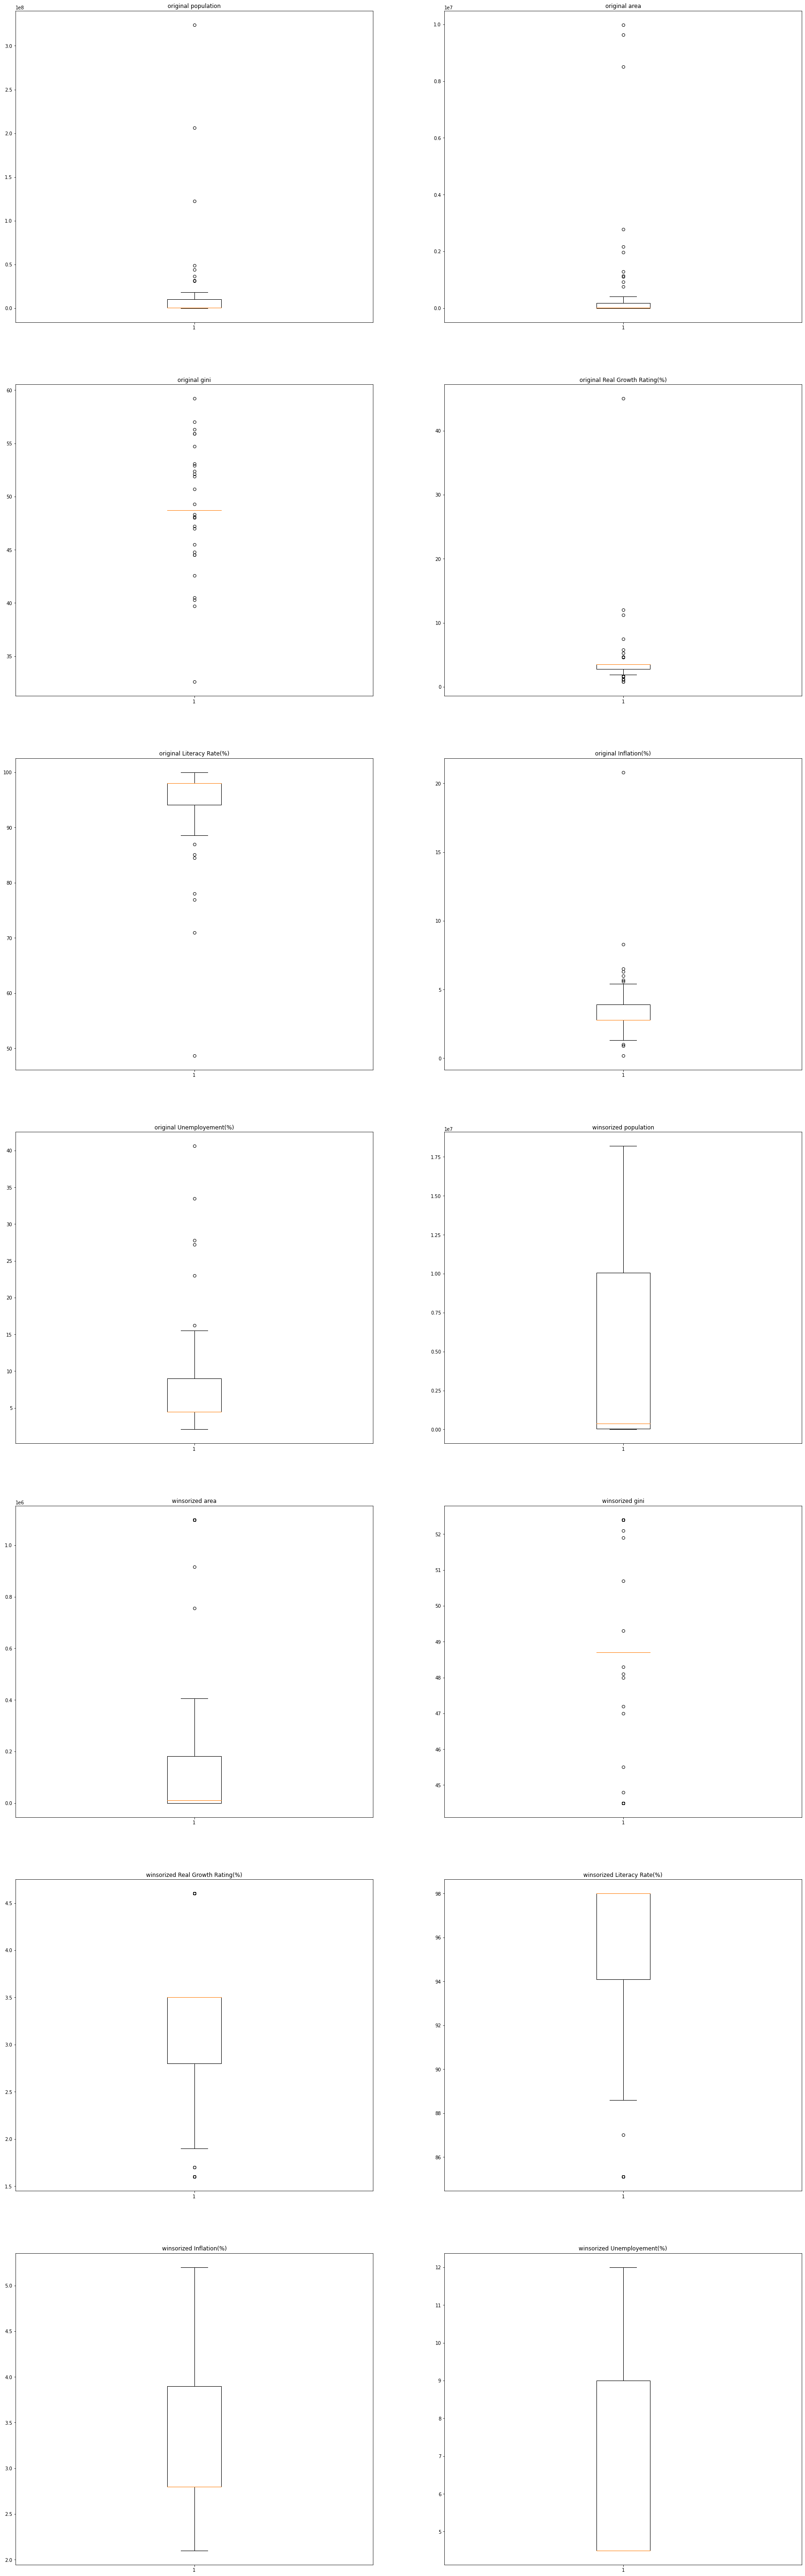

In [ ]:
plt.figure(figsize=(30,100))

for variable,i in col_dict.items():
    plt.subplot(7,2,i)
    original_variable = americas_region[variable]
    plt.boxplot(original_variable)
    plt.title("original "+variable)

    plt.subplot(7,2,7+i)
    winsorized_variable = winsorize(americas_region[variable],(0.1,0.15))
    plt.boxplot(winsorized_variable)
    plt.title("winsorized "+variable)

plt.show()

Now that we have reduced the number of outliers in each sub-dataframe, we can now merge all the sub-dataframes together to form a clean and tidy version of the original 250_countries datframe.

In [ ]:
dataframe_set = [asia_region, europe_region, africa_region, oceania_region, americas_region]
tidy_250_countries = pd.concat(dataframe_set)

In [ ]:
tidy_250_countries

Unnamed: 0  ... Unemployement(%)
0             0  ...             35.0
11           11  ...              NaN
15           15  ...              6.0
17           17  ...              NaN
18           18  ...              5.0
..          ...  ...              ...
229         229  ...              5.9
233         233  ...             10.0
239         239  ...              4.5
240         240  ...              6.5
243         243  ...              4.5

[247 rows x 11 columns]

In [ ]:
tidy_250_countries=tidy_250_countries.drop(["Unnamed: 0","region","subregion"],axis=1)
tidy_250_countries=tidy_250_countries.rename(columns={"name":"Country","population":"Population","area":"Area"})
tidy_250_countries

Country  ...  Unemployement(%)
0                           Afghanistan  ...              35.0
11                              Armenia  ...               NaN
15                           Azerbaijan  ...               6.0
17                              Bahrain  ...               NaN
18                           Bangladesh  ...               5.0
..                                  ...  ...               ...
229                 Trinidad and Tobago  ...               5.9
233            Turks and Caicos Islands  ...              10.0
239            United States of America  ...               4.5
240                             Uruguay  ...               6.5
243  Venezuela (Bolivarian Republic of)  ...               4.5

[247 rows x 8 columns]

Before we do so we will need to aggregate the world happiness report data so we would deal with only one year (the average of all 5 years)

In [ ]:
world_happiness_report_agg=world_happiness_report_df.groupby("Country").mean()
world_happiness_report_agg=world_happiness_report_agg.reset_index()
world_happiness_report_agg["Region"]=world_happiness_report_agg["Country"].map(countries_regions_dict)
Life_Expectancy_Data_df_agg=Life_Expectancy_Data_df.groupby(["Country","Status"]).mean()
Life_Expectancy_Data_df_agg=Life_Expectancy_Data_df_agg.drop(["Year","Population"],axis=1)
Life_Expectancy_Data_df_agg=Life_Expectancy_Data_df_agg.reset_index()
merged_df=pd.merge(Life_Expectancy_Data_df_agg, world_happiness_report_agg, on='Country')
merged_df=pd.merge(merged_df,tidy_250_countries, on="Country")
merged_df.columns.values

array(['Country', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling', 'HepatitisB',
       'Under Five Deaths', 'Freedom on Happiness',
       'GDP per Capita on Happiness', 'Generosity on Happiness',
       'Government Corruption on Happiness', 'Happiness Rank',
       'Happiness Score', 'Life Expectancy on Happiness',
       'Social Support on Happiness', 'Region', 'Population', 'Area',
       'gini', 'Real Growth Rating(%)', 'Literacy Rate(%)',
       'Inflation(%)', 'Unemployement(%)'], dtype=object)

Now for feature engineering we will one hot encode the status column

In [ ]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(merged_df['Status'])
# Drop column B as it is now encoded
merged_df = merged_df.drop('Status',axis = 1)
merged_df=merged_df.drop(["HepatitisB","Under-Five Deaths"],axis=1)
# Join the encoded df
merged_df = merged_df.join(one_hot)
merged_df

Country  Life Expectancy  ...  Developed  Developing
0    Afghanistan         58.19375  ...          0           1
1        Albania         75.15625  ...          0           1
2        Algeria         73.61875  ...          0           1
3         Angola         49.03750  ...          0           1
4      Argentina         75.15625  ...          0           1
..           ...              ...  ...        ...         ...
134      Uruguay         76.07500  ...          0           1
135   Uzbekistan         68.03125  ...          0           1
136        Yemen         63.86250  ...          0           1
137       Zambia         54.08750  ...          0           1
138     Zimbabwe         50.78125  ...          0           1

[139 rows x 37 columns]

Now we will label encode the region column

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
merged_df['Region']= label_encoder.fit_transform(merged_df['Region'])
keys = label_encoder.classes_
values = label_encoder.transform(label_encoder.classes_)
region_dictionary = dict(zip(keys, values))
print(region_dictionary)
merged_df["Happiness Score"]

{'Australia and New Zealand': 0, 'Central and Eastern Europe': 1, 'Eastern Asia': 2, 'Latin America and Caribbean': 3, 'Middle East and Northern Africa': 4, 'North America': 5, 'Southeastern Asia': 6, 'Southern Asia': 7, 'Sub-Saharan Africa': 8, 'Western Europe': 9}


0      0.161505
1      0.397872
2      0.586013
3      0.232319
4      0.742002
         ...   
134    0.736446
135    0.660599
136    0.183767
137    0.372616
138    0.258786
Name: Happiness Score, Length: 139, dtype: float64

We will add a feature that will be the discretization of the happiness score column, we'll name it Happiness Status then we will label encode the Happiness Status column

In [ ]:
print(merged_df["Happiness Score"].max())
print(merged_df["Happiness Score"].min())
happiness_status = pd.cut(merged_df["Happiness Score"], [0,0.25,0.5,0.75,1],labels=["Very Sad",'Mildly Sad','Mildly Happy','Very Happy'])
merged_df["Happiness Status"] = happiness_status
print(merged_df)

label_encoder = preprocessing.LabelEncoder() 
merged_df['Happiness Status']= label_encoder.fit_transform(merged_df['Happiness Status'])
keys = label_encoder.classes_
values = label_encoder.transform(label_encoder.classes_)
happiness_status_dictionary = dict(zip(keys, values))
print(happiness_status_dictionary)
merged_df["Happiness Status"]

0.9560677627576923
0.07604411387380064
         Country  Life Expectancy  ...  Developing  Happiness Status
0    Afghanistan         58.19375  ...           1          Very Sad
1        Albania         75.15625  ...           1        Mildly Sad
2        Algeria         73.61875  ...           1      Mildly Happy
3         Angola         49.03750  ...           1          Very Sad
4      Argentina         75.15625  ...           1      Mildly Happy
..           ...              ...  ...         ...               ...
134      Uruguay         76.07500  ...           1      Mildly Happy
135   Uzbekistan         68.03125  ...           1      Mildly Happy
136        Yemen         63.86250  ...           1          Very Sad
137       Zambia         54.08750  ...           1        Mildly Sad
138     Zimbabwe         50.78125  ...           1        Mildly Sad

[139 rows x 38 columns]
{'Mildly Happy': 0, 'Mildly Sad': 1, 'Very Happy': 2, 'Very Sad': 3}


0      3
1      1
2      0
3      3
4      0
      ..
134    0
135    0
136    3
137    1
138    1
Name: Happiness Status, Length: 139, dtype: int64

Now before asking questions we will see what columns we have to draw relations between them 

In [ ]:
merged_df.columns.values


array(['Country', 'Life Expectancy', 'Adult Mortality', 'Infant Deaths',
       'Alcohol', 'Percentage Expenditure', 'Hepatitis B', 'Measles',
       'BMI', 'Polio', 'Total Expenditure', 'Diphtheria', 'HIV/AIDS',
       'GDP', 'Thinness 1-19 Years', 'Thinness 5-9 Years',
       'Income Composition of Resources', 'Schooling',
       'Under Five Deaths', 'Freedom on Happiness',
       'GDP per Capita on Happiness', 'Generosity on Happiness',
       'Government Corruption on Happiness', 'Happiness Rank',
       'Happiness Score', 'Life Expectancy on Happiness',
       'Social Support on Happiness', 'Region', 'Population', 'Area',
       'gini', 'Real Growth Rating(%)', 'Literacy Rate(%)',
       'Inflation(%)', 'Unemployement(%)', 'Developed', 'Developing',
       'Happiness Status'], dtype=object)

The first question explores the effect of schooling on the literacy rate 

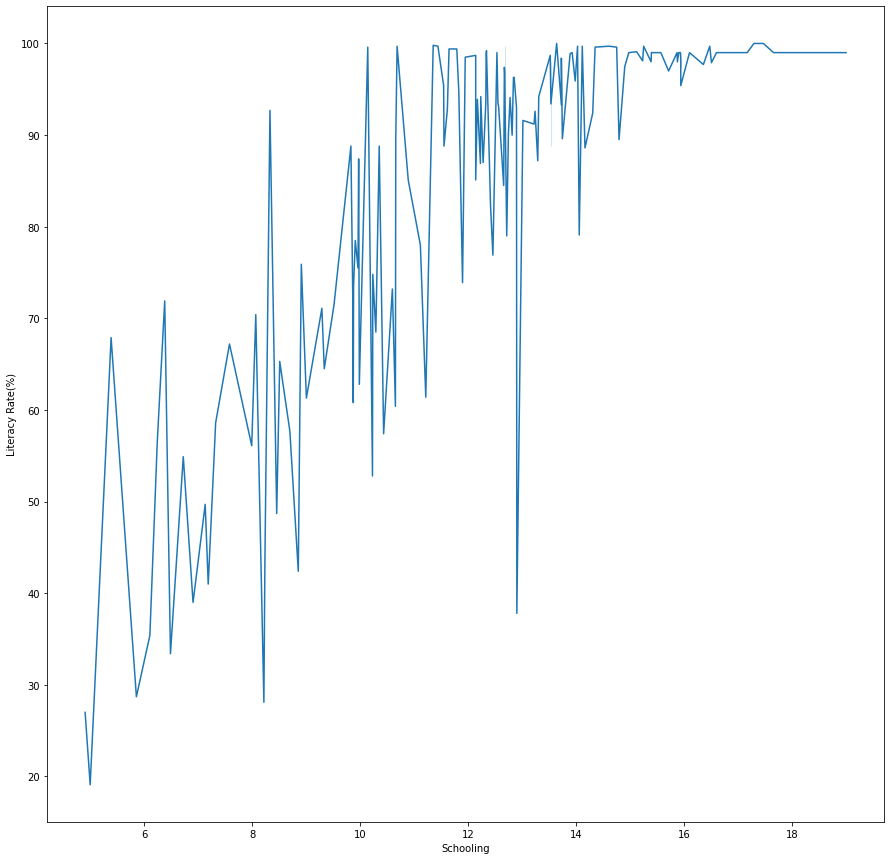

In [ ]:
# merged_df_question_one=merged_df.groupby(["Region"]).mean()
merged_df_question_one=merged_df.copy()
temp_dict = {y:x for x,y in region_dictionary.items()}
# print(merged_df_question_one.head())
merged_df_question_one["Region"]=merged_df_question_one["Region"].map(temp_dict)
# print(merged_df_question_one)
# multiple line plot

fig, ax = pyplot.subplots(figsize=(15,15))
sns.lineplot(data=merged_df_question_one, x="Schooling", y="Literacy Rate(%)", )


We find that we need to smooth out these columns so the following cell does that for us, then we will plot the scatterplot and find the pearson values

Pearsons correlation: 0.762


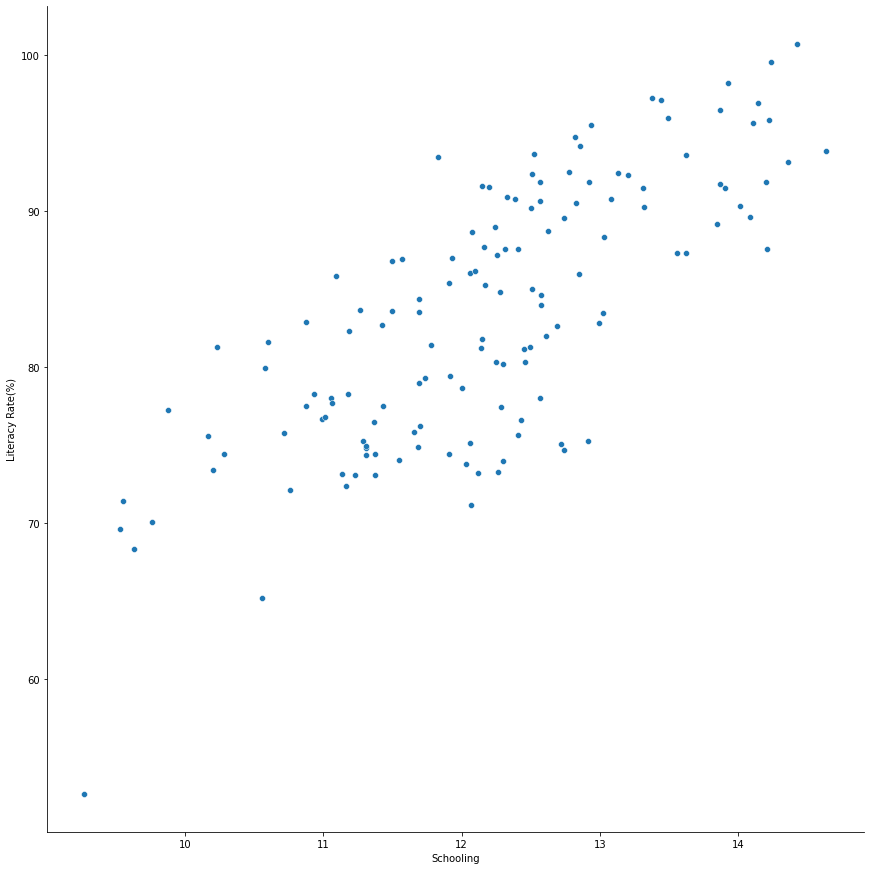

In [ ]:
from scipy.signal import savgol_filter
from scipy.stats import pearsonr 

merged_df_question_one["Literacy Rate(%)"] = savgol_filter(merged_df_question_one["Literacy Rate(%)"], 15, 2)
merged_df_question_one["Schooling"] = savgol_filter(merged_df_question_one["Schooling"], 15, 2)
# Convert dataframe into series 
list_schooling = merged_df_question_one["Schooling"] 
list_literacy = merged_df_question_one["Literacy Rate(%)"] 
corr, _ = pearsonr(list_schooling, list_literacy) 
print('Pearsons correlation: %.3f' % corr) 
sns.relplot(data=merged_df_question_one, x="Schooling", y="Literacy Rate(%)",height=12)

As visible from both graphs and after smoothing out the data we find that there is a positive correlation between the average years of schooling and the literacy rate . The pearson value is also close to one which suggests high correlation between the numbers. This means that indeed the more years people spend in school the higher literacy rate in the country which is very intuitive.

Question 2: This question determines whether there is a correlation between happiness level and the rate of alcohol consumption per capita. It asks the question if people drink more when they are unhappy or is the fact that drinking raises the level of happiness in a population.

To answer our question we will plot the data and do the pearson test

Pearsons correlation: 0.496


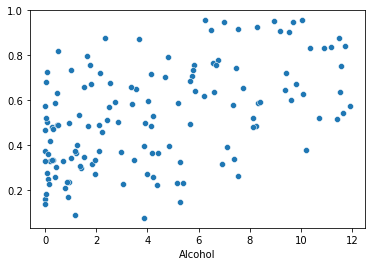

In [ ]:
from scipy.stats import pearsonr 
# Convert dataframe into series 
list_alcohol = merged_df['Alcohol'] 
list_score = merged_df['Happiness Score'] 
list_score = savgol_filter(list_score, 11, 10)
corr, _ = pearsonr(list_alcohol, list_score) 
print('Pearsons correlation: %.3f' % corr) 
sns.scatterplot( x = list_alcohol,y=list_score)

As we can see there is a positive correlations between the alcohol consumption and the happiness scores of the countries,it is the fact that drinking raises the level of happiness in a population.

Question 3 : Another question that needs to be asked is if the rate of unemployment has any effect on the level of happiness of a nation.

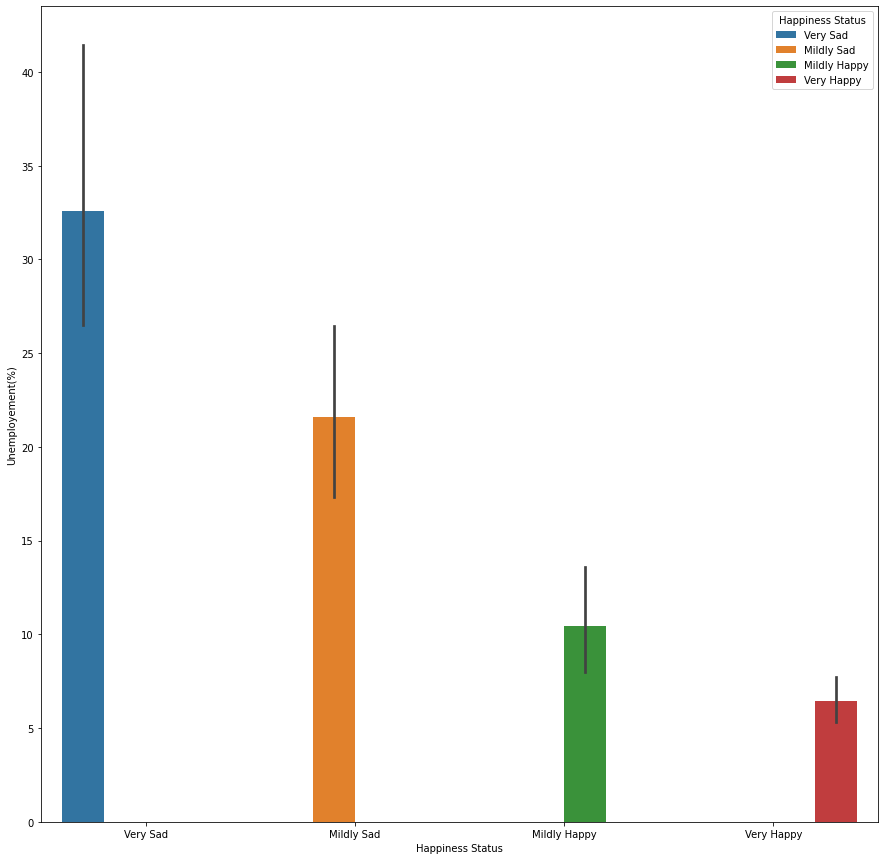

In [ ]:
merged_df_question_three=merged_df.copy()
temp_dict = {y:x for x,y in happiness_status_dictionary.items()}
merged_df_question_three["Happiness Status"]=merged_df_question_three["Happiness Status"].map(temp_dict)
fig, ax = pyplot.subplots(figsize=(15,15))
sns.barplot(data=merged_df_question_three, x="Happiness Status", y="Unemployement(%)", hue="Happiness Status")

As we can we can clearly see from the barplot above, there is a negative correlation between the rate of unemployment in a nation and the happiness status of that nation. The "Happiness Status" column is a discretized version of the "Happiness Score" column. The barplot indicates that as the rate of "Unemployement(%) rises, the number of nations wih happier statuses decreases dramatically.

Our 4th question, upon inspecting the merged data frame, is whether or not there exists a relation between countries' Unemployement rate and their GDP

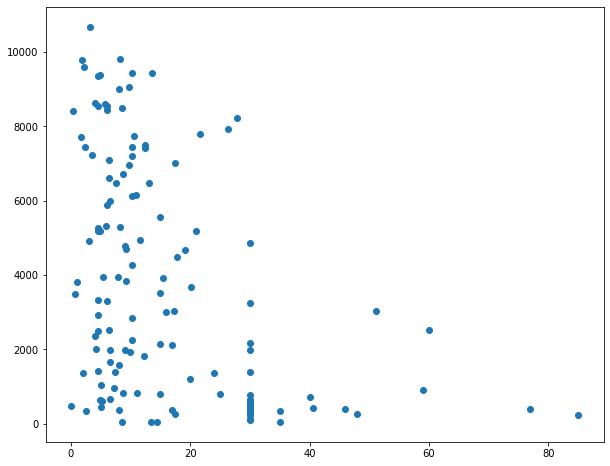

In [ ]:
merged_df_question_four = merged_df.copy()
fig, ax = pyplot.subplots(figsize=(10,8))

plt.scatter(merged_df_question_four["Unemployement(%)"], merged_df["GDP"])

After visualizing the data through a scatter plot, the graph suggests a negative correlation between the two variables. To make sure, we use the pearsons test below

In [ ]:
from scipy.stats import pearsonr
merged_df_question_four.dropna(inplace=True)

list_gdp = merged_df_question_four['GDP'] 
list_Unemp = merged_df_question_four['Unemployement(%)'] 
# Apply the pearsonr() 
corr, _ = pearsonr(list_gdp, list_Unemp) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.438


The result validates the prior suggestion and answers our question if there exists a relation between the GDP and the unemployment rate. The negative correlation between the two variables means that a country that suffers from a high rate of unemployment will usually have a low GDP. This makes sense as in the field of economics, it is known that they have an inverse relationship

Question 5: We can also engineer a feature representing the total percentage of immunized diseases in a country. We do this by adding the percentages of all the immunized diseases,i.e Hepatitis B, Diptheria, and Polio and dividing their sum by the total number of diseases recorded.

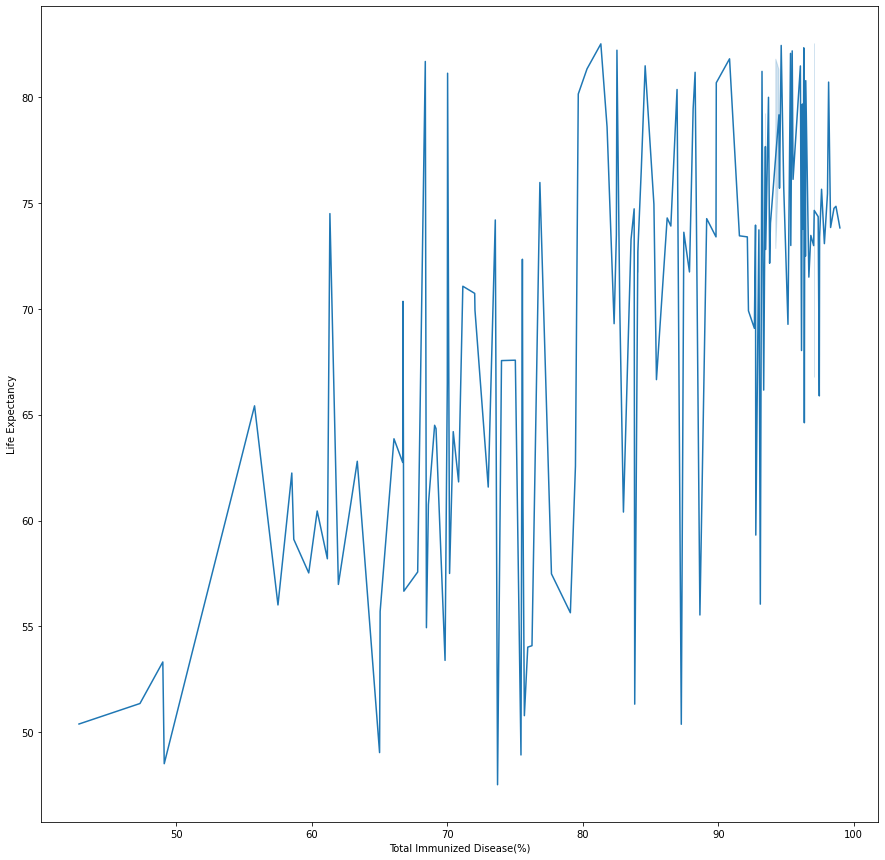

In [ ]:
merged_df_question_four = merged_df.copy()
merged_df_question_four["Total Immunized Disease(%)"] = (merged_df_question_four["Hepatitis B"]+merged_df_question_four["Polio"]+merged_df_question_four["Diphtheria"])/3
fig, ax = pyplot.subplots(figsize=(15,15))
sns.lineplot(data=merged_df_question_four, x="Total Immunized Disease(%)", y="Life Expectancy")

The data shows a possible positive correlation, we can try to smooth it in order to make the data more readable.

Pearsons correlation: 0.635


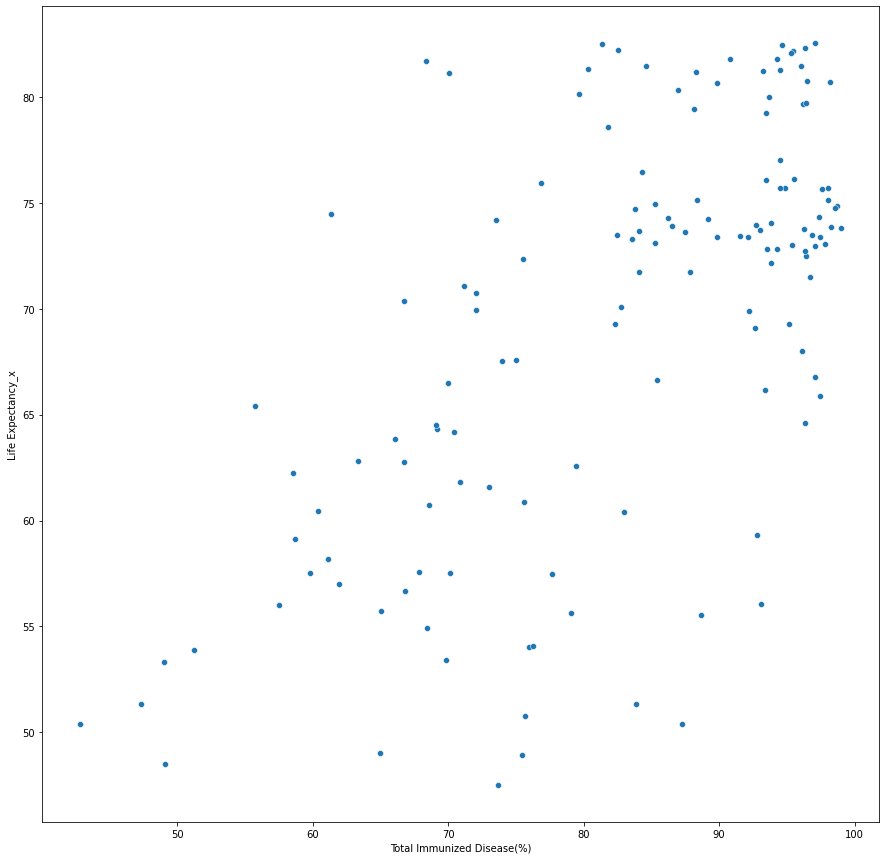

In [ ]:
from scipy.signal import savgol_filter
merged_df_question_four["Total Immunized Disease(%)"] = savgol_filter(merged_df_question_four["Total Immunized Disease(%)"], 3, 2, mode='nearest')
merged_df_question_four["Life Expectancy_x"] = savgol_filter(merged_df_question_four["Life Expectancy"], 3, 2, mode='nearest')
from scipy.stats import pearsonr

list_life_exp = merged_df_question_four['Life Expectancy_x'] 
list_total_disease = merged_df_question_four['Total Immunized Disease(%)'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list_life_exp, list_total_disease) 
print('Pearsons correlation: %.3f' % corr)
fig, ax = pyplot.subplots(figsize=(15,15))
sns.scatterplot(data=merged_df_question_four, x="Total Immunized Disease(%)", y="Life Expectancy_x")

As we can see from the graph and the usage of the pearson's correlation metric there actually is a positive correlation betwen the life expectancy and the the total percentage of immunized diseases in a country.

Our sixth question is to check for the difference in Real Growth Rating between developing countries and developing countries.

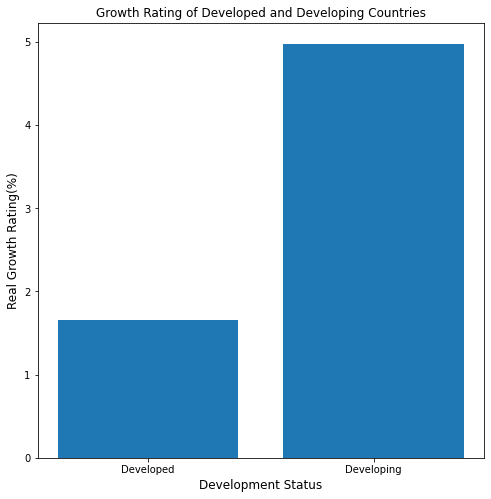

In [ ]:
is_developed = merged_df['Developed']==1
is_developing = merged_df['Developing']==1
deved_df = merged_df[is_developed]
deving_df = merged_df[is_developing]

deved_mean_GR = deved_df['Real Growth Rating(%)'].mean()
deving_mean_GR = deving_df['Real Growth Rating(%)'].mean()

plt.figure(figsize=(8,8))
plt.bar(("Developed", "Developing"),[deved_mean_GR,deving_mean_GR])
plt.xlabel("Development Status",fontsize=12)
plt.ylabel("Real Growth Rating(%)",fontsize=12)
plt.title("Growth Rating of Developed and Developing Countries")
plt.show()

Indeed, the bar chart shows a substantial difference in the real growth rating as developing countries have a much higher real growth rating than developed countries.